### IMDB Movie Prediction

####  **Data description**
The dataset (movie-review-data.csv) contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

---
#### Problem Statement:
Build Model to predict what kind of movies are more successful.
Take imdb scores as response variable and focus on operating predictions by analyzing the rest of variables in the movie data.

----
- Author:- Anuj Sharma
- Date:-28/06/2023

### Contents
1. Importing libraries and loading data
2. Exploratory data analysis:looking what's in data :Statistics
    1. Basic observations, feature statistics
    2. Visual representations
3. Modelling
    1. Data cleaning (Missing value replacement)
    2. Feature Engineering(Creating new features)
    3. Feature selection (Correlation , Eliminating features)
    4. Machine learning algorithms with hyperparameter tuning
4. Conclusion

### (1.1) Importing libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# setting up pandas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth')
#pd.options.display.float_format = '{:.2f}'.format


### (1.2) Loading data

In [109]:
#Set theme
palette_theme='gist_rainbow'
#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
input_folder_path=''
movie_data_filepath='movie_review_data.csv'

output_folder_path=r'C:\Users\ANUJ\project'
df_imdb_movie_data=pd.read_csv(movie_data_filepath)

#Basic formatting
textual_columns=[col for col in df_imdb_movie_data.columns if df_imdb_movie_data[col].dtype=='O']
for col in textual_columns:
    df_imdb_movie_data[col]=df_imdb_movie_data[col].astype(str).apply(lambda x: x.lower())
#Date format


In [110]:
df, df_unseen = train_test_split(df_imdb_movie_data, train_size=0.8, random_state=23)
#We will divide data into train and test randomly,
#And will find our analysis on training data
# We will write functions for data cleaning, feature engineering (feature creation ) and feature elimination/dropping
models_list=['xgboost','random_forest','DecisionTreeRegressor','LightGBM']

### 2 Exploratory Data Analysis

### 2.1 Basic data observations

In [111]:
df=df.reset_index()
df.head(5)

index  color     director_name  num_critic_for_reviews  duration  \
0   1870  color      oliver stone                   242.0     129.0   
1   3550  color  denis villeneuve                   226.0     139.0   
2    612  color        ron howard                   185.0     111.0   
3   2171  color   alexander payne                   549.0     115.0   
4    785  color     harold becker                    79.0     111.0   

   director_facebook_likes  actor_3_facebook_likes               actor_2_name  \
0                      0.0                   655.0                scott glenn   
1                    777.0                    58.0  mélissa désormeaux-poulin   
2                   2000.0                   244.0               clint howard   
3                    729.0                   552.0                nick krause   
4                     17.0                   652.0                miko hughes   

   actor_1_facebook_likes       gross                       genres  \
0                  2000.0  25517500.0      biography|drama|history   
1                   131.0   6857096.0            drama|mystery|war   
2                 17000.0  48430355.0                 comedy|drama   
3                  8000.0  82624961.0                 comedy|drama   
4                 13000.0  32940507.0  action|crime|drama|thriller   

       actor_1_name       movie_title  num_voted_users  \
0        toby jones               w.             40941   
1      lubna azabal        incendies             80429   
2    channing tatum      the dilemma             43709   
3  shailene woodley  the descendants            205284   
4      bruce willis   mercury rising             54314   

   cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
0                       4264    bruce mcgill                   1.0   
1                        343    ahmad massad                   0.0   
2                      18510    chelcie ross                   2.0   
3                       9578    beau bridges                   0.0   
4                      16536  carrie preston                   1.0   

                                       plot_keywords  \
0  bible|cabinet meeting|dog|drinking|family rela...   
1  brother sister relationship|family relationshi...   
2  best friend|friend|investigation|secret|two wo...   
3  boating accident|daughters|father daughter rel...   
4         autistic child|boy|child in danger|fbi|nsa   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt1175491/?ref_=fn_t...                 320.0   
1  http://www.imdb.com/title/tt1255953/?ref_=fn_t...                 156.0   
2  http://www.imdb.com/title/tt1578275/?ref_=fn_t...                 141.0   
3  http://www.imdb.com/title/tt1033575/?ref_=fn_t...                 439.0   
4  http://www.imdb.com/title/tt0120749/?ref_=fn_t...                 127.0   

  language country content_rating      budget  title_year  \
0  english     usa          pg-13  25100000.0      2008.0   
1   french  canada              r   6800000.0      2010.0   
2  english     usa          pg-13  70000000.0      2011.0   
3  english     usa              r  20000000.0      2011.0   
4  english     usa              r  60000000.0      1998.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   826.0         6.4          2.35                     0  
1                    66.0         8.2          1.85                 37000  
2                  1000.0         5.3          2.35                     0  
3                   727.0         7.3          2.35                 22000  
4                   968.0         6.1          2.35                     0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      4034 non-null   int64  
 1   color                      4034 non-null   object 
 2   director_name              4034 non-null   object 
 3   num_critic_for_reviews     3992 non-null   float64
 4   duration                   4020 non-null   float64
 5   director_facebook_likes    3953 non-null   float64
 6   actor_3_facebook_likes     4013 non-null   float64
 7   actor_2_name               4034 non-null   object 
 8   actor_1_facebook_likes     4027 non-null   float64
 9   gross                      3322 non-null   float64
 10  genres                     4034 non-null   object 
 11  actor_1_name               4034 non-null   object 
 12  movie_title                4034 non-null   object 
 13  num_voted_users            4034 non-null   int64

##### Numeric feature statistics

In [113]:
df.describe()

index  num_critic_for_reviews     duration  \
count  4034.000000             3992.000000  4020.000000   
mean   2531.140059              138.925100   106.750746   
std    1455.347523              121.107986    24.971416   
min       0.000000                1.000000     7.000000   
25%    1269.250000               50.000000    93.000000   
50%    2524.500000              109.000000   103.000000   
75%    3787.750000              192.000000   118.000000   
max    5042.000000              813.000000   511.000000   

       director_facebook_likes  actor_3_facebook_likes  \
count              3953.000000             4013.000000   
mean                716.320769              639.185647   
std                2907.081466             1655.239472   
min                   0.000000                0.000000   
25%                   7.000000              132.000000   
50%                  49.000000              375.000000   
75%                 189.000000              636.000000   
max               23000.000000            23000.000000   

       actor_1_facebook_likes         gross  num_voted_users  \
count             4027.000000  3.322000e+03     4.034000e+03   
mean              6558.733797  4.795554e+07     8.322695e+04   
std              15608.298184  6.927918e+07     1.398188e+05   
min                  0.000000  7.030000e+02     5.000000e+00   
25%                624.000000  5.314945e+06     8.472500e+03   
50%                989.000000  2.508627e+07     3.286900e+04   
75%              11000.000000  6.024061e+07     9.369800e+04   
max             640000.000000  7.605058e+08     1.689764e+06   

       cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
count                4034.000000           4024.000000           4014.000000   
mean                 9646.822013              1.354125            274.546338   
std                 18640.448254              1.926719            387.880037   
min                     0.000000              0.000000              1.000000   
25%                  1422.000000              0.000000             64.000000   
50%                  3130.000000              1.000000            156.000000   
75%                 13618.250000              2.000000            327.000000   
max                656730.000000             31.000000           5060.000000   

             budget   title_year  actor_2_facebook_likes   imdb_score  \
count  3.640000e+03  3949.000000             4021.000000  4034.000000   
mean   3.698728e+07  2002.567992             1603.384979     6.429921   
std    1.072575e+08    12.306733             4060.856462     1.132269   
min    2.180000e+02  1916.000000                0.000000     1.900000   
25%    6.000000e+06  1999.000000              284.000000     5.800000   
50%    1.985000e+07  2005.000000              595.000000     6.600000   
75%    4.200000e+07  2011.000000              918.000000     7.200000   
max    4.200000e+09  2016.000000           137000.000000     9.500000   

       aspect_ratio  movie_facebook_likes  
count   3767.000000           4034.000000  
mean       2.198535           7378.247149  
std        1.271873          19707.735667  
min        1.200000              0.000000  
25%        1.850000              0.000000  
50%        2.350000            166.000000  
75%        2.350000           2000.000000  
max       16.000000         349000.000000

##### Column wise null values percentage

In [114]:
df_percent_null=pd.DataFrame(100*df.isnull().sum()/len(df))
df_percent_null.reset_index(inplace=True)
df_percent_null.columns=['column_name','percent_null']
df_percent_null.sort_values('percent_null',ascending=False)

column_name  percent_null
9                       gross     17.649975
23                     budget      9.766981
27               aspect_ratio      6.618741
24                 title_year      2.107090
5     director_facebook_likes      2.007933
3      num_critic_for_reviews      1.041150
6      actor_3_facebook_likes      0.520575
19       num_user_for_reviews      0.495786
4                    duration      0.347050
25     actor_2_facebook_likes      0.322261
16       facenumber_in_poster      0.247893
8      actor_1_facebook_likes      0.173525
18            movie_imdb_link      0.000000
26                 imdb_score      0.000000
22             content_rating      0.000000
21                    country      0.000000
20                   language      0.000000
0                       index      0.000000
14  cast_total_facebook_likes      0.000000
17              plot_keywords      0.000000
15               actor_3_name      0.000000
1                       color      0.000000
13            num_voted_users      0.000000
12                movie_title      0.000000
11               actor_1_name      0.000000
10                     genres      0.000000
7                actor_2_name      0.000000
2               director_name      0.000000
28       movie_facebook_likes      0.000000

### (2.2) Looking into specific columns

- 1. Correlation between features
- 2. Target column
- 3. String/object column
- 4. Numerical column

In [115]:
for col in df.columns:
    print(col,df[col].dtype)

index int64
color object
director_name object
num_critic_for_reviews float64
duration float64
director_facebook_likes float64
actor_3_facebook_likes float64
actor_2_name object
actor_1_facebook_likes float64
gross float64
genres object
actor_1_name object
movie_title object
num_voted_users int64
cast_total_facebook_likes int64
actor_3_name object
facenumber_in_poster float64
plot_keywords object
movie_imdb_link object
num_user_for_reviews float64
language object
country object
content_rating object
budget float64
title_year float64
actor_2_facebook_likes float64
imdb_score float64
aspect_ratio float64
movie_facebook_likes int64


In [116]:
#Columns with numeric datatype
numeric_columns=[col for col in df.columns if (df[col].dtype=='float64' or df[col].dtype=='int64') ]

#Columns with object datatype
obj_columns=[col for col in df.columns if df[col].dtype=='object']
#Columns with time datatype(Formatiing data for easy usage)
datetime_columns=['title_year']


print("Numeric columns")
print(numeric_columns)
print("String/object columns")
print(obj_columns)
print("Datetime columns")
print(datetime_columns)

Numeric columns
['index', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
String/object columns
['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
Datetime columns
['title_year']


In [117]:
print('Target column: imdb_score')
print('Number of numeric columns',len([col for col in numeric_columns if col not in ['index','imdb_ratio']]))
print('Number of string/object columns',len(obj_columns))
print('Number of datetime columns',len(datetime_columns), 'title_year')

Target column: imdb_score
Number of numeric columns 16
Number of string/object columns 12
Number of datetime columns 1 title_year


### Correlation
We will also check correlatoin among final constructed features later

### Correlation between numeric variables

<AxesSubplot:>

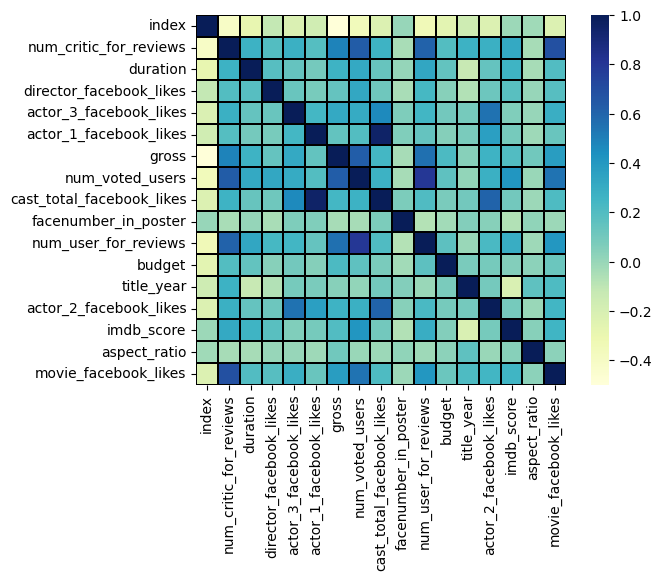

In [118]:
#'title_year' is taken here as numeric
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [119]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrmat.unstack().sort_values(ascending=False)
sorted_mat

index                      index                        1.000000
num_critic_for_reviews     num_critic_for_reviews       1.000000
aspect_ratio               aspect_ratio                 1.000000
imdb_score                 imdb_score                   1.000000
actor_2_facebook_likes     actor_2_facebook_likes       1.000000
title_year                 title_year                   1.000000
budget                     budget                       1.000000
num_user_for_reviews       num_user_for_reviews         1.000000
facenumber_in_poster       facenumber_in_poster         1.000000
num_voted_users            num_voted_users              1.000000
gross                      gross                        1.000000
actor_1_facebook_likes     actor_1_facebook_likes       1.000000
actor_3_facebook_likes     actor_3_facebook_likes       1.000000
director_facebook_likes    director_facebook_likes      1.000000
duration                   duration                     1.000000
cast_total_facebook_likes

In [120]:
df_corr=pd.DataFrame(sorted_mat).reset_index()
df_corr.columns=['feature_1','feature_2','correlation']
df_corr['abs_corr']=df_corr['correlation'].apply(lambda x:abs(x))
df_corr=df_corr[df_corr['abs_corr']!=1]
df_corr.sort_values('abs_corr',ascending=False)

feature_1                  feature_2  correlation  \
17      actor_1_facebook_likes  cast_total_facebook_likes     0.952549   
18   cast_total_facebook_likes     actor_1_facebook_likes     0.952549   
19        num_user_for_reviews            num_voted_users     0.798432   
20             num_voted_users       num_user_for_reviews     0.798432   
21      num_critic_for_reviews       movie_facebook_likes     0.683880   
22        movie_facebook_likes     num_critic_for_reviews     0.683880   
23             num_voted_users     num_critic_for_reviews     0.634883   
24      num_critic_for_reviews            num_voted_users     0.634883   
25                       gross            num_voted_users     0.625687   
26             num_voted_users                      gross     0.625687   
28      num_critic_for_reviews       num_user_for_reviews     0.613114   
27        num_user_for_reviews     num_critic_for_reviews     0.613114   
29      actor_2_facebook_likes  cast_total_facebook_likes     0.604961   
30   cast_total_facebook_likes     actor_2_facebook_likes     0.604961   
31        num_user_for_reviews                      gross     0.559813   
32                       gross       num_user_for_reviews     0.559813   
33      actor_2_facebook_likes     actor_3_facebook_likes     0.549307   
34      actor_3_facebook_likes     actor_2_facebook_likes     0.549307   
35        movie_facebook_likes            num_voted_users     0.548827   
36             num_voted_users       movie_facebook_likes     0.548827   
287                      index                      gross    -0.499353   
288                      gross                      index    -0.499353   
37                       gross     num_critic_for_reviews     0.489905   
38      num_critic_for_reviews                      gross     0.489905   
40      actor_3_facebook_likes  cast_total_facebook_likes     0.465514   
39   cast_total_facebook_likes     actor_3_facebook_likes     0.465514   
41             num_voted_users                 imdb_score     0.412633   
42                  imdb_score            num_voted_users     0.412633   
286     num_critic_for_reviews                      index    -0.408085   
285                      index     num_critic_for_reviews    -0.408085   
44        movie_facebook_likes       num_user_for_reviews     0.404542   
43        num_user_for_reviews       movie_facebook_likes     0.404542   
46                       gross       movie_facebook_likes     0.376362   
45        movie_facebook_likes                      gross     0.376362   
47      actor_1_facebook_likes     actor_2_facebook_likes     0.365757   
48      actor_2_facebook_likes     actor_1_facebook_likes     0.365757   
284                      index            num_voted_users    -0.356556   
283            num_voted_users                      index    -0.356556   
282                      index       num_user_for_reviews    -0.346294   
281       num_user_for_reviews                      index    -0.346294   
50                    duration       num_user_for_reviews     0.330219   
49        num_user_for_reviews                   duration     0.330219   
51             num_voted_users    director_facebook_likes     0.323896   
52     director_facebook_likes            num_voted_users     0.323896   
53      actor_3_facebook_likes                      gross     0.320296   
54                       gross     actor_3_facebook_likes     0.320296   
55             num_voted_users                   duration     0.317839   
56                    duration            num_voted_users     0.317839   
57                  imdb_score     num_critic_for_reviews     0.315401   
58      num_critic_for_reviews                 imdb_score     0.315401   
59             num_voted_users     actor_3_facebook_likes     0.305876   
60      actor_3_facebook_likes            num_voted_users     0.305876   
61                  imdb_score       num_user_for_reviews     0.293257   
62        num_user_for_re

##### Insights
- **Highly correlated pairs**: 
    1. actor_1_facebook_likes and cast_total_facebook_likes	
    2. num_user_for_reviews and num_voted_users 
    3. num_critic_for_reviews and movie_facebook_likes
    4. num_critic_for_reviews	and num_voted_users
    5. gross and num_voted_users
    6. num_critic_for_reviews and num_user_for_reviews
    

- **Feature engineering step**: 
    1. Take cast_total_facebook_likes from {actor_1_facebook_likes and cast_total_facebook_likes} (low null values)
    2. Take num_voted_users from {num_user_for_reviews and num_voted_users} (low null values)
    3. Gross amount seems to be a very useful value for imdb_score intutively, so this should be used as it is.
    4. Both num_user_for_reviews and num_voted_users seems to determine different aspect related to the movie, so both could be used
---
- **For other combinations correlation value is not that significant.**


### Target column related response :: 'imdb_score'

In [121]:
df['imdb_score']

0       6.4
1       8.2
2       5.3
3       7.3
4       6.1
5       6.6
6       7.2
7       7.0
8       6.4
9       2.8
10      5.6
11      7.0
12      7.3
13      8.1
14      6.8
15      7.3
16      6.1
17      6.7
18      5.1
19      8.0
20      6.9
21      6.6
22      9.0
23      6.9
24      7.0
25      6.7
26      8.4
27      6.5
28      7.4
29      7.2
30      5.0
31      7.2
32      6.4
33      6.0
34      7.5
35      4.1
36      6.2
37      7.8
38      7.2
39      6.5
40      6.0
41      8.1
42      5.4
43      6.2
44      6.3
45      8.4
46      6.6
47      6.7
48      6.0
49      7.1
50      7.4
51      8.0
52      7.1
53      6.1
54      5.5
55      7.8
56      7.8
57      7.4
58      7.0
59      3.3
60      8.6
61      6.8
62      7.3
63      4.7
64      8.0
65      7.3
66      7.7
67      6.0
68      6.9
69      4.9
70      4.8
71      6.4
72      5.2
73      5.5
74      6.4
75      6.9
76      7.6
77      6.8
78      5.7
79      8.6
80      6.3
81      7.1
82      5.6
83  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

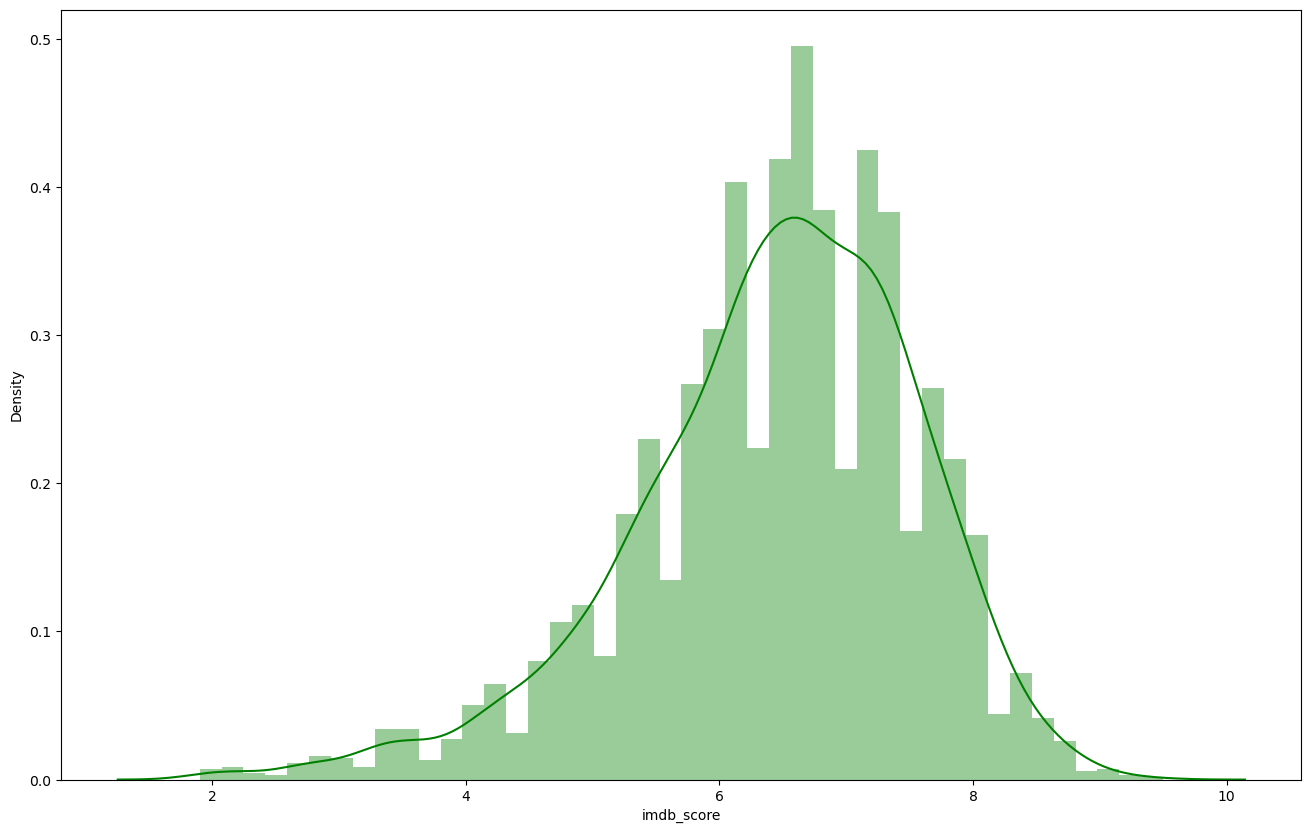

In [122]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['imdb_score'],ax=ax,color='green')

In [22]:
#Bucketing imdb_score 

In [23]:
df['imdb_score']

results, bin_edges = pd.qcut(df['imdb_score'],
                            q=[0, .1, .4, .6, .8, 1],
                            
                            retbins=True)

In [24]:
df['imdb_bucket']=pd.cut(df['imdb_score'], [0, 1,2,3,4,5,6,7,8,9,10])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imdb_bucket', ylabel='count'>

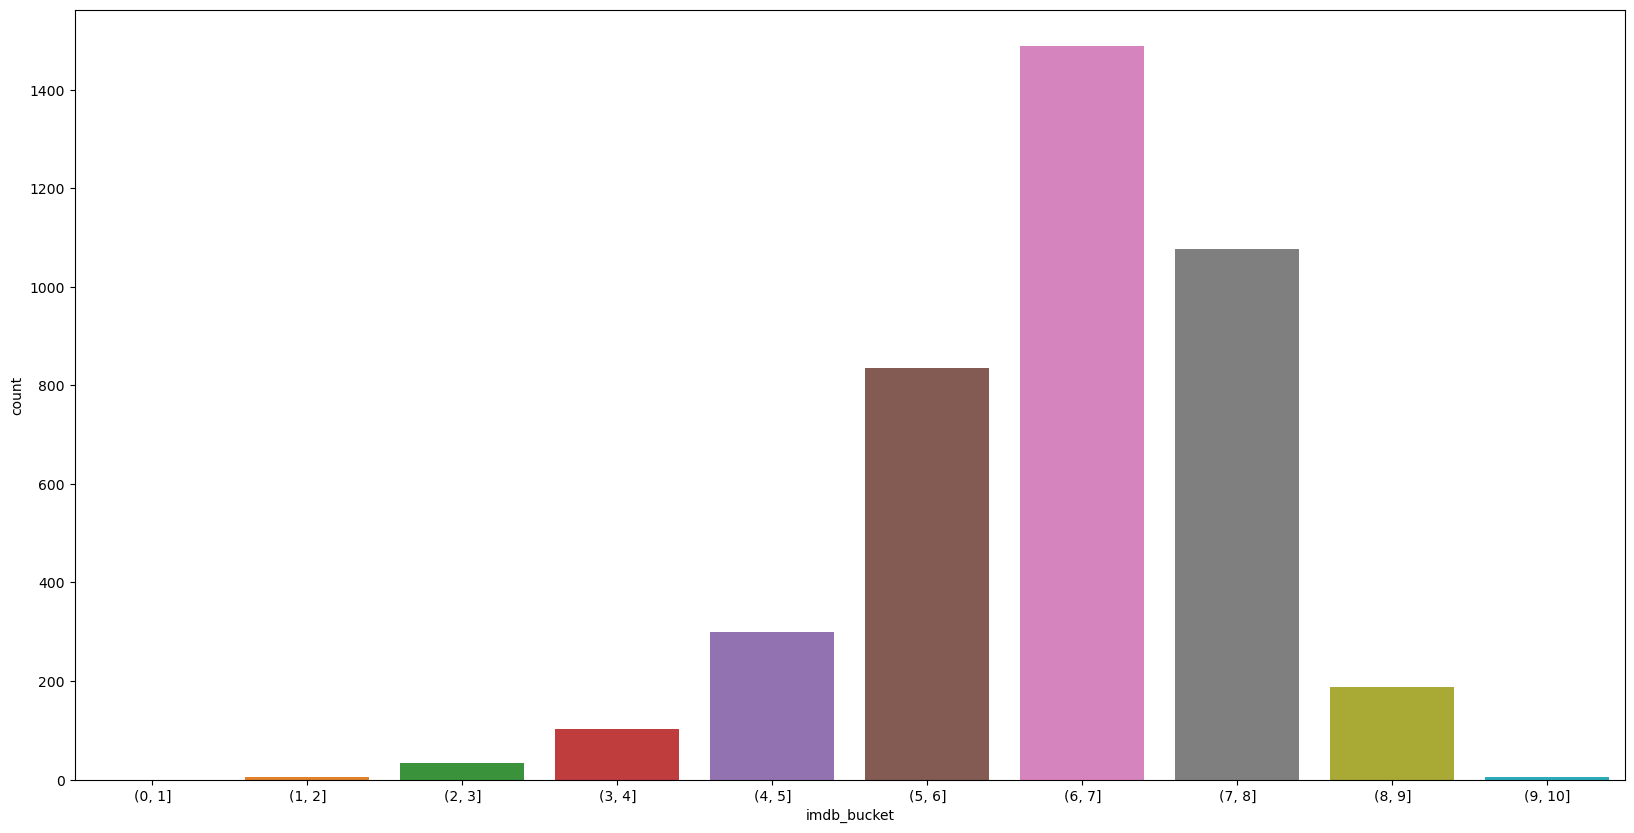

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['imdb_bucket'],ax=ax)

In [26]:
df.drop('imdb_bucket',inplace=True,axis=1)

##### Insights
- The imdb score distribution is an approximate bell curve.
- To predict the imdb_score if we are using a classification approach, the scores have to be binned . 
- Also as the distribution is not uniform , we might need to use SMOTE/undersampling/ oversampling techniques.
----
- We also need to see how imdb score behaves with other features

### String /object columns related insights

#### 'movie_title', 'movie_imdb_link'

In [27]:
df['movie_title']

0                                                     w. 
1                                              incendies 
2                                            the dilemma 
3                                        the descendants 
4                                         mercury rising 
5                                                   dune 
6                  anchorman: the legend of ron burgundy 
7                                         public enemies 
8                                              leap year 
9                                                 doogal 
10                                 house on haunted hill 
11                                     hollywood shuffle 
12                                              the road 
13                           the best years of our lives 
14                                goal! the dream begins 
15                                                 amen. 
16                                       chasing liberty 
17            

In [28]:
df['movie_imdb_link']

0       http://www.imdb.com/title/tt1175491/?ref_=fn_t...
1       http://www.imdb.com/title/tt1255953/?ref_=fn_t...
2       http://www.imdb.com/title/tt1578275/?ref_=fn_t...
3       http://www.imdb.com/title/tt1033575/?ref_=fn_t...
4       http://www.imdb.com/title/tt0120749/?ref_=fn_t...
5       http://www.imdb.com/title/tt0087182/?ref_=fn_t...
6       http://www.imdb.com/title/tt0357413/?ref_=fn_t...
7       http://www.imdb.com/title/tt1152836/?ref_=fn_t...
8       http://www.imdb.com/title/tt1216492/?ref_=fn_t...
9       http://www.imdb.com/title/tt0763304/?ref_=fn_t...
10      http://www.imdb.com/title/tt0185371/?ref_=fn_t...
11      http://www.imdb.com/title/tt0093200/?ref_=fn_t...
12      http://www.imdb.com/title/tt0898367/?ref_=fn_t...
13      http://www.imdb.com/title/tt0036868/?ref_=fn_t...
14      http://www.imdb.com/title/tt0380389/?ref_=fn_t...
15      http://www.imdb.com/title/tt0280653/?ref_=fn_t...
16      http://www.imdb.com/title/tt0360139/?ref_=fn_t...
17      http:/

##### Insights
- Hard to find any intutive relation between 'movie_title' feature and other features
- May be more information could be scrapped from 'movie_imdb_link' feature
- **Data cleaning step**: None
- **Feature engineering step**: None, Both 'movie_title' and 'movie_imdb_link' should be dropped 

####  'color' 

In [29]:
df['color'].value_counts()

color               3855
 black and white     161
nan                   18
Name: color, dtype: int64

In [30]:
(df['color'].value_counts()/df['color'].shape[0])*100

color               95.562717
 black and white     3.991076
nan                  0.446207
Name: color, dtype: float64

In [31]:
#Relation with imdb score
#std, min, max could be calculated... but output shows no useful insight
df.groupby(['color']).agg(np.mean)

index  num_critic_for_reviews    duration  \
color                                                               
 black and white  3377.900621              127.503106  109.695652   
color             2492.522179              139.861111  106.702759   
nan               3228.000000               23.400000   89.705882   

                  director_facebook_likes  actor_3_facebook_likes  \
color                                                               
 black and white              1324.575949              327.391304   
color                          693.605980              653.595673   
nan                             74.750000              321.812500   

                  actor_1_facebook_likes         gross  num_voted_users  \
color                                                                     
 black and white             3466.888199  2.389259e+07     85897.677019   
color                        6647.956601  4.874794e+07     83436.521660   
nan                         15139.722222  1.346503e+06     14454.944444   

                  cast_total_facebook_likes  facenumber_in_poster  \
color                                                               
 black and white                5166.236025              1.465839   
color                           9802.704799              1.349545   
nan                            16338.277778              1.333333   

                  num_user_for_reviews        budget   title_year  \
color                                                               
 black and white            318.565217  1.537711e+07  1983.006329   
color                       273.670315  3.801721e+07  2003.353455   
nan                          41.687500  7.385950e+06  2011.428571   

                  actor_2_facebook_likes  imdb_score  aspect_ratio  \
color                                                                
 black and white              839.577640    7.288199      1.895032   
color                        1640.314338    6.395824      2.208122   
nan                           488.882353    6.055556      4.381667   

                  movie_facebook_likes  
color                                   
 black and white           4001.273292  
color                      7538.889235  
nan                        3179.222222

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

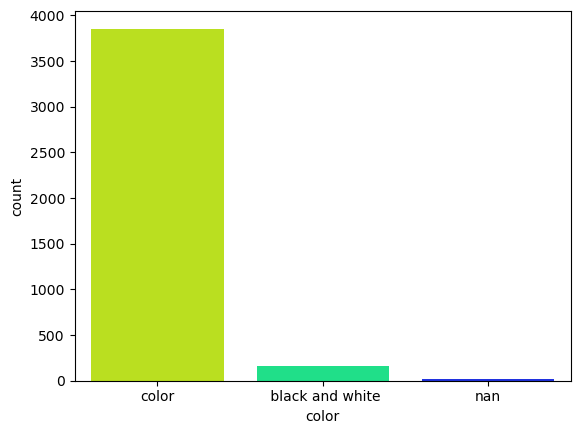

In [32]:
#Count/distribution plot of 'color' feature
sns.countplot(df['color'],palette=palette_theme)

##### Insights
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.
- **Data cleaning step**: With this high percentage of coloured movies , the nan/missing values can be filled with 'color'
- **Feature engineering step**: None, One hot encoding, but this won't be used because of heavy concentration on one side

#####  'director_name'

In [33]:
df['director_name'].value_counts().shape

(2088,)

In [34]:
df['director_name'].value_counts()

nan                                 81
steven spielberg                    22
woody allen                         18
clint eastwood                      16
steven soderbergh                   14
spike lee                           14
tim burton                          13
martin scorsese                     13
ridley scott                        13
renny harlin                        11
ron howard                          11
peter jackson                       11
tony scott                          11
shawn levy                          11
robert rodriguez                    10
brian de palma                      10
kevin smith                         10
joel schumacher                     10
david fincher                       10
sam raimi                           10
robert zemeckis                     10
richard donner                      10
barry levinson                      10
oliver stone                        10
john carpenter                       9
stephen frears           

In [35]:
df.groupby(['director_name']).agg(np.mean)['imdb_score'].sort_values(ascending=False).shape

(2088,)

In [36]:
# Top directors based on avg. rating
#Relation with imdb score
#std, min, max could be calculated... but output shows no useful insight
df_top_dir=df.groupby(['director_name']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_top_dir.columns=['mean_rating','frequency']
df_top_dir

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\2576589062.py:4: FutureWarning: ['color', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_top_dir=df.groupby(['director_name']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)


mean_rating  frequency
director_name                                           
nan                                  7.476543         81
steven spielberg                     7.372727         22
woody allen                          7.066667         18
clint eastwood                       7.250000         16
spike lee                            6.550000         14
steven soderbergh                    6.728571         14
martin scorsese                      7.869231         13
tim burton                           6.907692         13
ridley scott                         7.130769         13
ron howard                           6.809091         11
shawn levy                           6.090909         11
renny harlin                         5.827273         11
peter jackson                        7.563636         11
tony scott                           6.790909         11
kevin smith                          6.780000         10
brian de palma                       6.480000         10
sam raimi                            7.040000         10
oliver stone                         6.670000         10
david fincher                        7.750000         10
robert zemeckis                      7.030000         10
barry levinson                       6.350000         10
robert rodriguez                     5.840000         10
joel schumacher                      6.390000         10
richard donner                       6.960000         10
richard linklater                    7.200000          9
stephen frears                       7.000000          9
john carpenter                       6.811111          9
tyler perry                          4.900000          9
quentin tarantino                    8.200000          8
michael bay                          6.700000          8
wes craven                           6.050000          8
neil jordan                          6.762500          8
alfred hitchcock                     7.350000          8
guy ritchie                          7.262500          8
david gordon green                   6.575000          8
rob reiner                           7.150000          8
christopher nolan                    8.425000          8
francis ford coppola                 7.825000          8
edward zwick                         7.242857          7
chris columbus                       6.342857          7
yimou zhang                          7.285714          7
rob cohen                            5.828571          7
george a. romero                     6.928571          7
joe dante                            6.300000          7
simon west                           5.914286          7
paul w.s. anderson                   6.100000          7
david ayer                           6.771429          7
stephen herek                        6.014286          7
frank oz                             6.571429          7
m. night shyamalan                   6.042857          7
john mctiernan                       6.285714          7
jaume collet-serra                   6.642857          7
bobby farrelly                       6.200000          7
james mangold                        7.042857          7
harold ramis                         6.785714          7
jay roach                            6.414286          7
danny boyle                          7.471429          7
brett ratner                         6.457143          7
phillip noyce                        6.814286          7
peter segal                          6.185714          7
jon turteltaub                       6.566667          6
paul verhoeven                       6.716667          6
frank coraci                         5.783333          6
bryan singer                         7.200000          6
john singleton                       6.233333          6
alejandro g. iñárritu                7.783333          6
adam shankman                        6.066667          6
cameron crowe                        6.583333          6
ang lee                              7.26666

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='director_name', ylabel='count'>

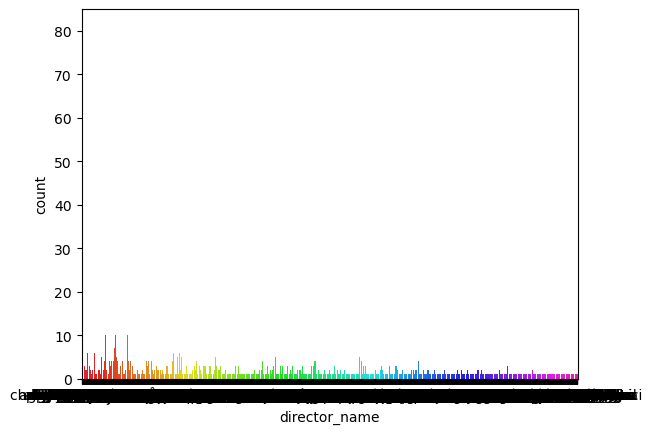

In [37]:
#Count/distribution plot of 'director_name' feature
sns.countplot(df['director_name'],palette=palette_theme)
#Not a useful plot

##### Insights
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.

- **Data cleaning step**: Empty string (but feature used could be top rated director)
- **Feature engineering step**: It is obsrved that top directors have good imdb rating, so top director could be a feature or  rated  directors could be a feature

#### "genre"

In [38]:
df['genres'].apply(lambda x:x.split('|'))

0                             [biography, drama, history]
1                                   [drama, mystery, war]
2                                         [comedy, drama]
3                                         [comedy, drama]
4                        [action, crime, drama, thriller]
5                             [action, adventure, sci-fi]
6                                                [comedy]
7             [biography, crime, drama, history, romance]
8                                       [comedy, romance]
9         [adventure, animation, comedy, family, fantasy]
10                            [horror, mystery, thriller]
11                                               [comedy]
12                                     [adventure, drama]
13                                  [drama, romance, war]
14                                [drama, romance, sport]
15                         [biography, crime, drama, war]
16                                      [comedy, romance]
17            

In [39]:
#Unique genres
unique_genres=set()
all_genre_list=[]
for row in df['genres'].apply(lambda x:x.split('|')):
    for genre in row:
        unique_genres.add(genre)
        all_genre_list.append(genre)
#To take care of new genre adding other
unique_genres.add('other')
all_genre_list=pd.Series(all_genre_list)


print('unique genres')
print(unique_genres)

unique genres
{'western', 'romance', 'war', 'family', 'news', 'other', 'drama', 'horror', 'adventure', 'action', 'documentary', 'fantasy', 'comedy', 'mystery', 'biography', 'crime', 'film-noir', 'musical', 'thriller', 'animation', 'history', 'music', 'reality-tv', 'sci-fi', 'game-show', 'short', 'sport'}


In [40]:
all_genre_list.value_counts()

drama          2066
comedy         1532
thriller       1105
action          912
romance         894
adventure       752
crime           714
fantasy         485
sci-fi          479
horror          456
family          447
mystery         406
biography       226
animation       208
war             170
music           168
history         162
sport           145
musical         111
documentary      97
western          73
short             5
film-noir         5
reality-tv        2
news              2
game-show         1
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

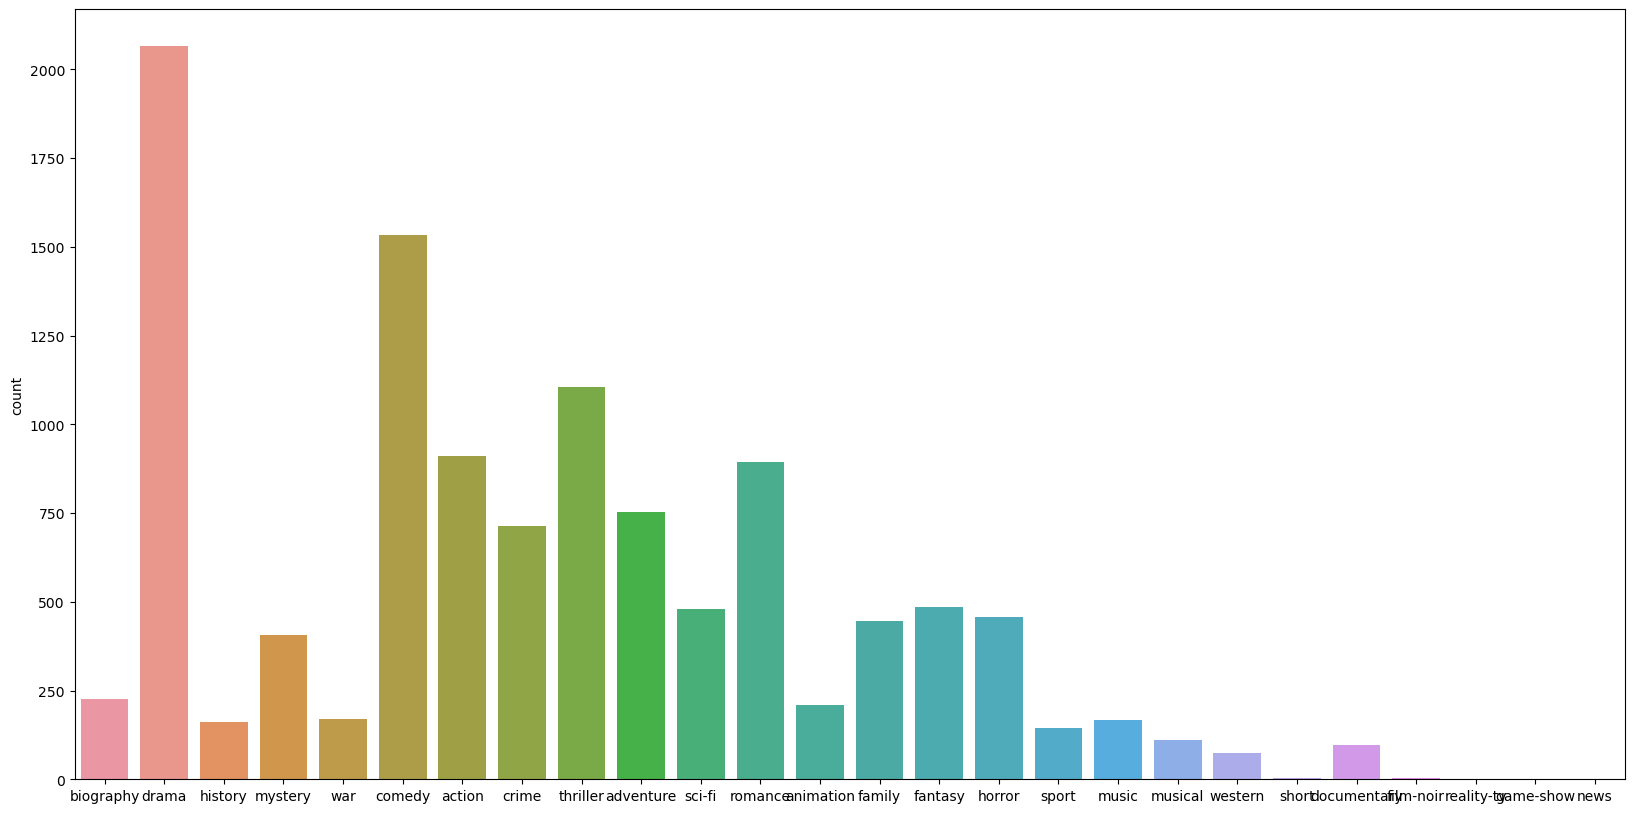

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(all_genre_list,ax=ax)

In [42]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [43]:
df_genre=pd.DataFrame(np.zeros((df.shape[0],len(unique_genres)),dtype=type(1)),columns=unique_genres)
df_genre['genres']=df['genres']
df_genre['imdb_score']=df['imdb_score']
def genre_func(row,col_name):
    if col_name in row['genres'].split('|'):
        return 1
    else:
        return 0
for col_name in unique_genres:
#     print(col_name)
    df_genre[col_name]=df_genre.apply(lambda x:genre_func(x,col_name),axis=1)
df_genre.head(10)

western  romance  war  family  news  other  drama  horror  adventure  \
0        0        0    0       0     0      0      1       0          0   
1        0        0    1       0     0      0      1       0          0   
2        0        0    0       0     0      0      1       0          0   
3        0        0    0       0     0      0      1       0          0   
4        0        0    0       0     0      0      1       0          0   
5        0        0    0       0     0      0      0       0          1   
6        0        0    0       0     0      0      0       0          0   
7        0        1    0       0     0      0      1       0          0   
8        0        1    0       0     0      0      0       0          0   
9        0        0    0       1     0      0      0       0          1   

   action  documentary  fantasy  comedy  mystery  biography  crime  film-noir  \
0       0            0        0       0        0          1      0          0   
1       0            0        0       0        1          0      0          0   
2       0            0        0       1        0          0      0          0   
3       0            0        0       1        0          0      0          0   
4       1            0        0       0        0          0      1          0   
5       1            0        0       0        0          0      0          0   
6       0            0        0       1        0          0      0          0   
7       0            0        0       0        0          1      1          0   
8       0            0        0       1        0          0      0          0   
9       0            0        1       1        0          0      0          0   

   musical  thriller  animation  history  music  reality-tv  sci-fi  \
0        0         0          0        1      0           0       0   
1        0         0          0        0      0           0       0   
2        0         0          0        0      0           0       0   
3        0         0          0        0      0           0       0   
4        0         1          0        0      0           0       0   
5        0         0          0        0      0           0       1   
6        0         0          0        0      0           0       0   
7        0         0          0        1      0           0       0   
8        0         0          0        0      0           0       0   
9        0         0          1        0      0           0       0   

   game-show  short  sport                                     genres  \
0          0      0      0                    biography|drama|history   
1          0      0      0                          drama|mystery|war   
2          0      0      0                               comedy|drama   
3          0      0      0                               comedy|drama   
4          0      0      0                action|crime|drama|thriller   
5          0      0      0                    action|adventure|sci-fi   
6          0      0      0                                     comedy   
7          0      0      0      biography|crime|drama|history|romance   
8          0      0      0                             comedy|romance   
9          0      0      0  adventure|animation|comedy|family|fantasy   

   imdb_score  
0         6.4  
1         8.2  
2         5.3  
3         7.3  
4         6.1  
5         6.6  
6         7.2  
7         7.0  
8         6.4  
9         2.8

In [44]:
#Groupby col_name and imdb_score

##### Insights
- Most popular genres: Drama, comedy, thriller, action and romance

- **Data cleaning step**: Entity embedding (auto-encoder could be used here)
- **Feature engineering step**: Feature columns can be constructed for these genres

#### 'plot_keywords'

In [45]:
df['plot_keywords']
unique_keywords=set()
for row in df['plot_keywords'].apply(lambda x:x.split('|')):
    for keyword in row:
        unique_keywords.add(keyword)
print(len(unique_keywords))

7098


##### Insights
- Using plot_keywords doesn't seem intutive for imdb_score prediction, as there are many unique keywords.
- Some other approach may be taken to include this in modelling, but but currently here it's not being used

- **Data cleaning step**: None
- **Feature engineering step**: Drop this feature while modelling

#### 'language'

In [46]:
df['language'].value_counts()

english       3771
french          52
spanish         31
hindi           22
mandarin        20
japanese        17
german          15
nan             11
russian          9
cantonese        8
italian          8
portuguese       6
hebrew           5
swedish          5
arabic           4
dutch            4
korean           4
persian          3
polish           3
norwegian        2
thai             2
danish           2
indonesian       2
aboriginal       2
none             2
dari             2
chinese          2
icelandic        2
mongolian        1
swahili          1
czech            1
dzongkha         1
aramaic          1
bosnian          1
hungarian        1
telugu           1
romanian         1
panjabi          1
maya             1
urdu             1
kazakh           1
slovenian        1
filipino         1
greek            1
zulu             1
kannada          1
Name: language, dtype: int64

In [47]:
df_language=df.groupby(['language']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_language.columns=['mean_imdb_rating','frequency']
df_language['percentage']=df_language['frequency'].apply(lambda x: x/df.shape[0])
df_language.reset_index(inplace=True)
df_language

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\3482322922.py:1: FutureWarning: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'country', 'content_rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_language=df.groupby(['language']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)


language  mean_imdb_rating  frequency  percentage
0      english          6.385866       3771    0.934804
1       french          7.086538         52    0.012890
2      spanish          6.945161         31    0.007685
3        hindi          6.768182         22    0.005454
4     mandarin          6.930000         20    0.004958
5     japanese          7.352941         17    0.004214
6       german          7.286667         15    0.003718
7          nan          6.945455         11    0.002727
8      russian          6.055556          9    0.002231
9      italian          6.875000          8    0.001983
10   cantonese          6.900000          8    0.001983
11  portuguese          7.433333          6    0.001487
12      hebrew          7.580000          5    0.001239
13     swedish          7.440000          5    0.001239
14       dutch          7.425000          4    0.000992
15      korean          7.475000          4    0.000992
16      arabic          7.375000          4    0.000992
17      polish          7.966667          3    0.000744
18     persian          7.300000          3    0.000744
19   icelandic          7.550000          2    0.000496
20  indonesian          7.900000          2    0.000496
21        dari          7.500000          2    0.000496
22      danish          8.100000          2    0.000496
23     chinese          5.650000          2    0.000496
24        thai          6.650000          2    0.000496
25        none          7.950000          2    0.000496
26   norwegian          7.300000          2    0.000496
27  aboriginal          6.950000          2    0.000496
28   slovenian          6.400000          1    0.000248
29     swahili          7.400000          1    0.000248
30      telugu          8.400000          1    0.000248
31    romanian          6.500000          1    0.000248
32        urdu          7.000000          1    0.000248
33     kannada          7.100000          1    0.000248
34     panjabi          6.600000          1    0.000248
35   mongolian          7.300000          1    0.000248
36        maya          7.800000          1    0.000248
37      kazakh          6.000000          1    0.000248
38   hungarian          7.100000          1    0.000248
39       greek          7.300000          1    0.000248
40    filipino          6.700000          1    0.000248
41    dzongkha          7.500000          1    0.000248
42       czech          7.400000          1    0.000248
43     bosnian          4.300000          1    0.000248
44     aramaic          7.100000          1    0.000248
45        zulu          6.900000          1    0.000248

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

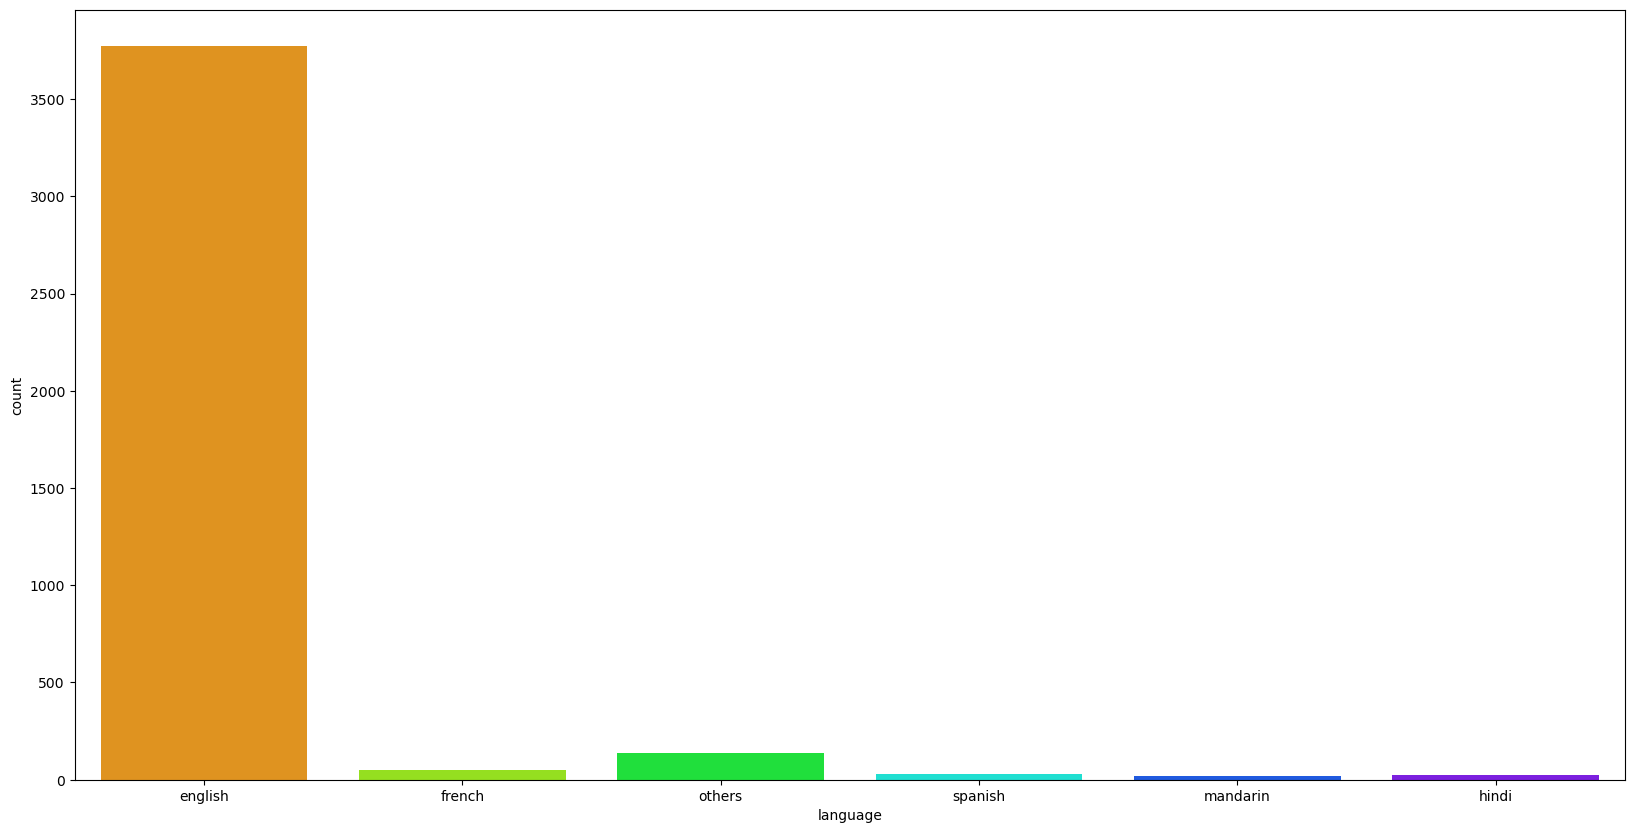

In [48]:
#Count/distribution plot of 'country' feature
fig, ax = plt.subplots(figsize=(20,10))
top_5_language=list(df['language'].value_counts().nlargest(5).sort_index().index)
sns.countplot(df['language'].apply(lambda x:x if x in top_5_language else 'others'),palette=palette_theme)

##### Insights
- It can be noticed that most of the movies in this list  is from USA. 

- **Data cleaning step**: nan values can be filled with usa , 
- **Feature engineering step**:Language category can have english or non_english (1/0)

#### 'country'

In [49]:
df['country'].value_counts()/df['country'].shape[0]*100

usa                     75.855231
uk                       8.701041
france                   2.776401
canada                   2.528508
germany                  2.007933
australia                1.016361
india                    0.669311
spain                    0.619732
china                    0.594943
japan                    0.495786
italy                    0.470997
hong kong                0.347050
mexico                   0.347050
new zealand              0.347050
ireland                  0.297471
south korea              0.247893
russia                   0.223104
denmark                  0.173525
brazil                   0.173525
sweden                   0.148736
south africa             0.148736
nan                      0.123946
norway                   0.123946
israel                   0.099157
netherlands              0.099157
thailand                 0.074368
argentina                0.074368
poland                   0.074368
czech republic           0.074368
iceland       

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

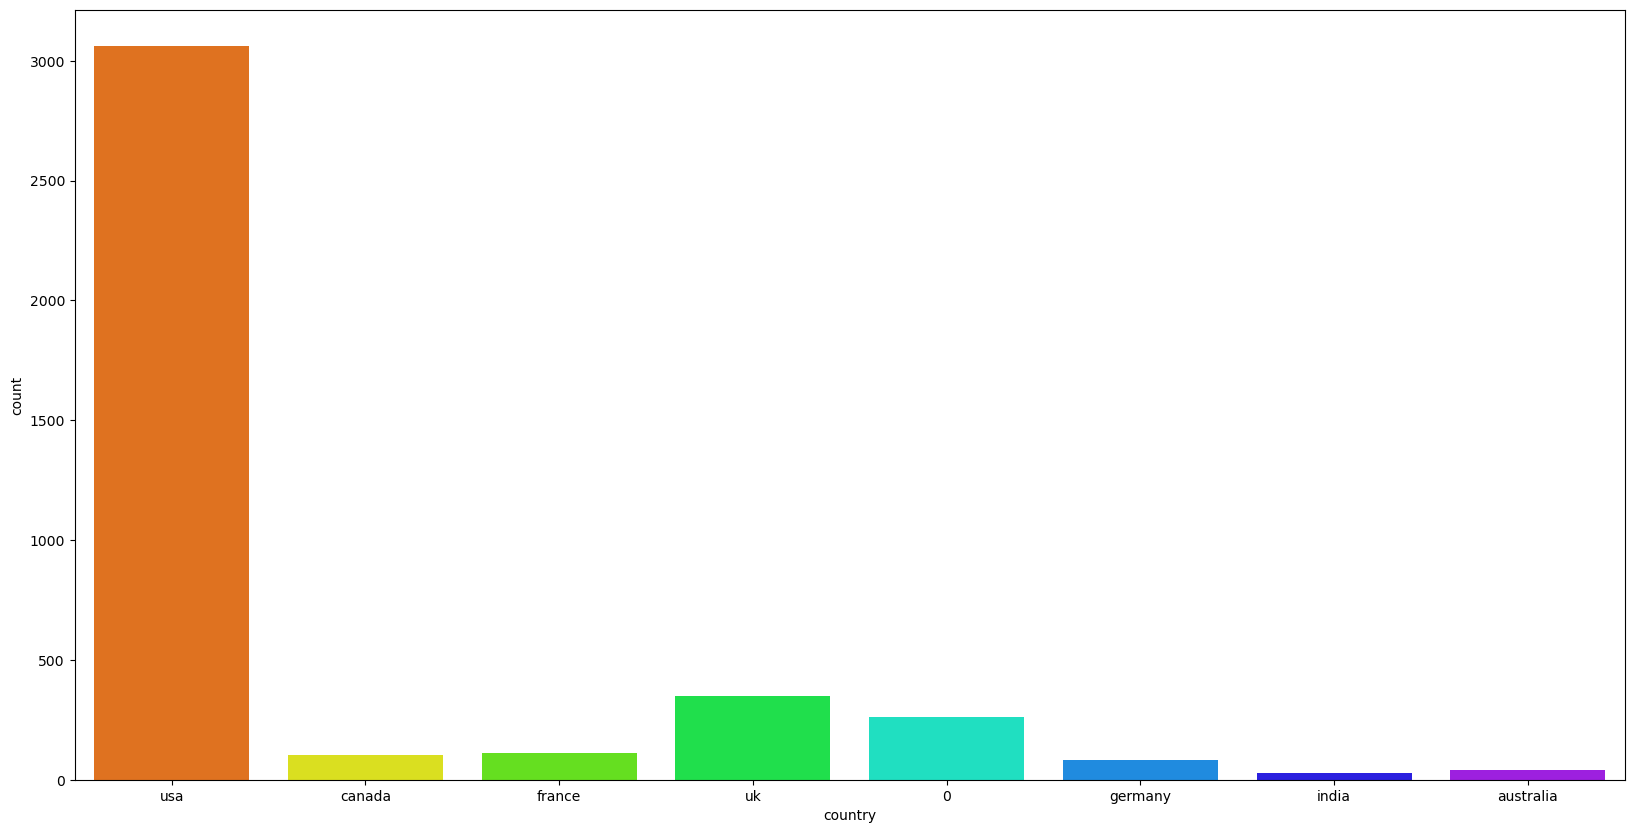

In [50]:
#Count/distribution plot of 'country' feature
fig, ax = plt.subplots(figsize=(20,10))
top_7_country=list(df['country'].value_counts().nlargest(7).sort_index().index)
sns.countplot(df['country'].apply(lambda x:x if x in top_7_country else 0),palette=palette_theme)

In [51]:
df_country=df.groupby(['country']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_country.columns=['mean_imdb_rating','frequency']
df_country['percentage']=df_country['frequency'].apply(lambda x: x/df.shape[0])
df_country.reset_index(inplace=True)
df_country

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\1907726652.py:1: FutureWarning: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'content_rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_country=df.groupby(['country']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)


country  mean_imdb_rating  frequency  percentage
0                    usa          6.349641       3060    0.758552
1                     uk          6.825926        351    0.087010
2                 france          6.683036        112    0.027764
3                 canada          6.180392        102    0.025285
4                germany          6.362963         81    0.020079
5              australia          6.582927         41    0.010164
6                  india          6.651852         27    0.006693
7                  spain          6.816000         25    0.006197
8                  china          6.754167         24    0.005949
9                  japan          7.080000         20    0.004958
10                 italy          6.705263         19    0.004710
11                mexico          6.871429         14    0.003471
12             hong kong          6.621429         14    0.003471
13           new zealand          7.335714         14    0.003471
14               ireland          6.783333         12    0.002975
15           south korea          5.840000         10    0.002479
16                russia          5.711111          9    0.002231
17               denmark          7.214286          7    0.001735
18                brazil          7.157143          7    0.001735
19          south africa          6.533333          6    0.001487
20                sweden          7.516667          6    0.001487
21                   nan          6.800000          5    0.001239
22                norway          6.360000          5    0.001239
23           netherlands          7.425000          4    0.000992
24                israel          7.525000          4    0.000992
25               iceland          7.333333          3    0.000744
26             argentina          7.766667          3    0.000744
27        czech republic          6.966667          3    0.000744
28              thailand          6.033333          3    0.000744
29               belgium          5.966667          3    0.000744
30                poland          7.966667          3    0.000744
31               romania          5.700000          2    0.000496
32               hungary          6.450000          2    0.000496
33                  iran          8.000000          2    0.000496
34                greece          7.000000          2    0.000496
35          soviet union          8.100000          1    0.000248
36           philippines          6.300000          1    0.000248
37              slovenia          6.400000          1    0.000248
38           switzerland          5.700000          1    0.000248
39              slovakia          6.000000          1    0.000248
40                taiwan          7.900000          1    0.000248
41                turkey          6.000000          1    0.000248
42  united arab emirates          8.200000          1    0.000248
43           afghanistan          7.400000          1    0.000248
44            kyrgyzstan          8.700000          1    0.000248
45                  peru          5.400000          1    0.000248
46               finland          7.200000          1    0.000248
47                 aruba          4.800000          1    0.000248
48               bahamas          4.400000          1    0.000248
49              bulgaria          6.100000          1    0.000248
50              cameroon          7.500000          1    0.000248
51                 chile          6.900000          1    0.000248
52    dominican republic          6.900000          1    0.000248
53                 egypt          8.100000          1    0.000248
54               georgia          5.600000          1    0.000248
55                panama          7.200000          1    0.000248
56             indonesia          7.600000          1    0.000248
57                 kenya          7.400000          1    0.000248
58                 libya          8.400000          1    0.000248
59              new line          4.400000          1    

##### Insights
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of country

- **Data cleaning step**: nan values can be filled with usa , 
- **Feature engineering step**:Take top 3 categories

#### 'content_rating'

In [52]:
df_cr=df.groupby('content_rating').agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_cr.columns=['mean_imdb_rating','frequency']
df_cr.reset_index(inplace=True)
df_cr

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\4179695314.py:1: FutureWarning: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_cr=df.groupby('content_rating').agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)


content_rating  mean_imdb_rating  frequency
0               r          6.513416       1692
1           pg-13          6.239202       1153
2              pg          6.290510        569
3             nan          6.389431        246
4               g          6.572917         96
5       not rated          6.620652         92
6         unrated          6.906000         50
7        approved          7.414286         42
8           tv-14          7.170370         27
9           tv-ma          8.162500         16
10              x          6.563636         11
11           tv-g          7.011111          9
12          tv-pg          7.211111          9
13         passed          7.140000          5
14          nc-17          6.340000          5
15              m          6.840000          5
16             gp          7.060000          5
17           tv-y          7.400000          1
18          tv-y7          7.200000          1

<AxesSubplot:xlabel='content_rating', ylabel='mean_imdb_rating'>

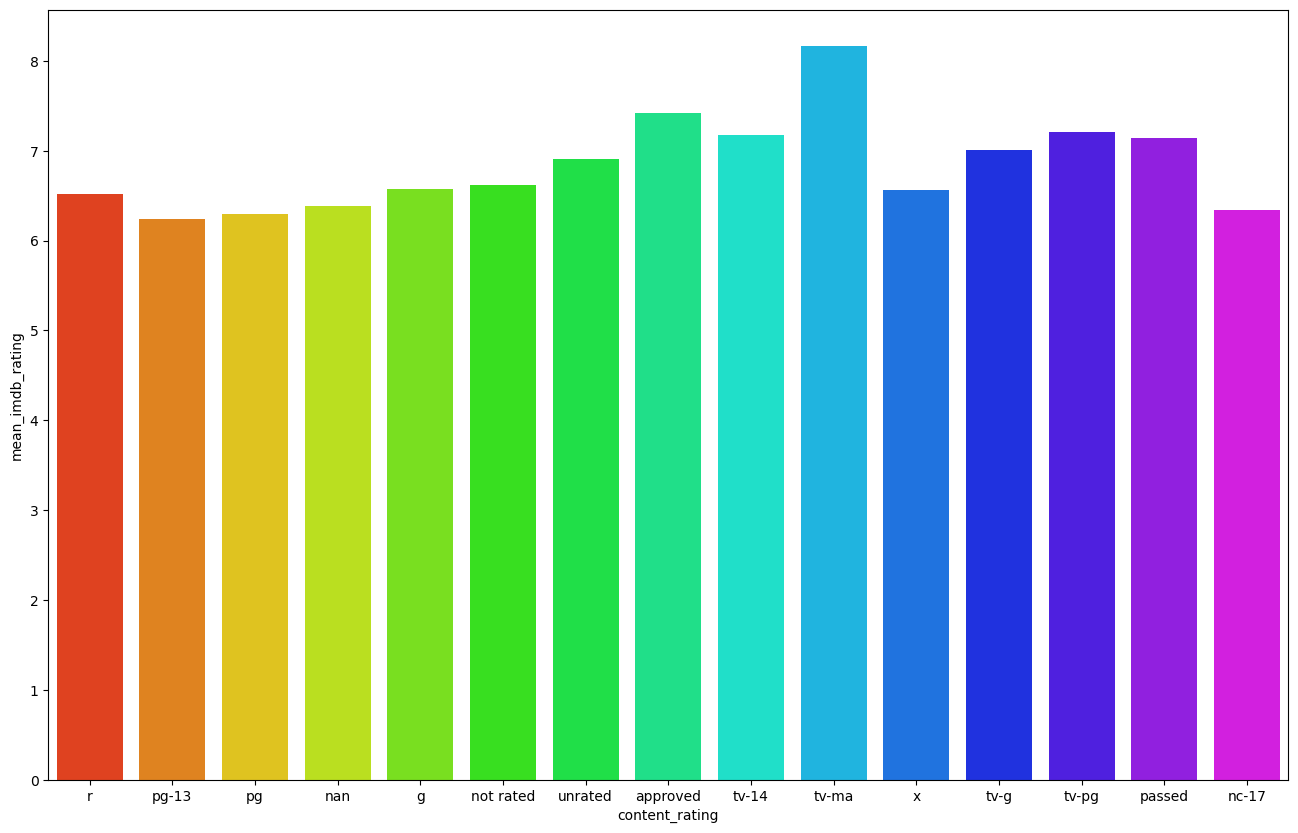

In [53]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="content_rating", y="mean_imdb_rating", ax=ax, data=df_cr[:15],palette=palette_theme)

##### Insights
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of content_rating

- **Data cleaning step**: Unrated , Not rated and nan can be clubbed
- **Feature engineering step**:Take top 3 categories

#### Actor names: 'actor_1_name','actor_2_name','actor_3_name'

In [54]:
df[['movie_title','actor_1_name','actor_2_name','actor_3_name']]

movie_title  \
0                                                   w.    
1                                            incendies    
2                                          the dilemma    
3                                      the descendants    
4                                       mercury rising    
5                                                 dune    
6                anchorman: the legend of ron burgundy    
7                                       public enemies    
8                                            leap year    
9                                               doogal    
10                               house on haunted hill    
11                                   hollywood shuffle    
12                                            the road    
13                         the best years of our lives    
14                              goal! the dream begins    
15                                               amen.    
16                                     chasing liberty    
17                                           shattered    
18                                     jennifer's body    
19                                      cinderella man    
20                                        the majestic    
21                                          kick-ass 2    
22                                     the dark knight    
23                                             stripes    
24                                        jack reacher    
25                                        silent movie    
26                                     american beauty    
27                                     the poker house    
28                                    zero dark thirty    
29                                         the apostle    
30              alvin and the chipmunks: the road chip    
31                                   sands of iwo jima    
32                                          blood work    
33    teenage mutant ninja turtles ii: the secret of...   
34                                                2046    
35                                    a warrior's tail    
36                                            stigmata    
37                                    the color purple    
38                               live free or die hard    
39                                 alice in wonderland    
40                                   for colored girls    
41                             the missing                
42                                  this thing of ours    
43                              step up 2: the streets    
44                                    the tigger movie    
45                                 requiem for a dream    
46                       the odd life of timothy green    
47                                        the proposal    
48                                  let's go to prison    
49                                   little white lies    
50                          the baader meinhof complex    
51                                      the iron giant    
52                                         pitch black    
53                                   parental guidance    
54                                          the timber    
55                                         the verdict    
56                                   the little prince    
57                                         topsy-turvy    
58                                      perfect cowboy    
59                                            catwoman    
60                                  the usual suspects    
61                                          safe house    
62                                        gosford park    
63                                    against the wild    
64                                             boyhood    
65                     the secret life of walter mitty    
66                                    the last samurai    
67                              

In [55]:
df['actor_1_name'].value_counts()

robert de niro                43
johnny depp                   28
nicolas cage                  28
j.k. simmons                  27
bruce willis                  27
liam neeson                   24
harrison ford                 23
morgan freeman                23
bill murray                   22
jason statham                 22
robin williams                21
steve buscemi                 21
scarlett johansson            20
keanu reeves                  20
tom cruise                    20
christian bale                20
denzel washington             20
anthony hopkins               19
robert downey jr.             19
tom hanks                     19
kevin spacey                  18
philip seymour hoffman        17
gerard butler                 17
jim broadbent                 17
brad pitt                     17
will ferrell                  16
leonardo dicaprio             16
naomi watts                   16
ryan gosling                  15
dwayne johnson                15
sylvester 

### Numerical features


#### 'aspect_ratio'

In [56]:
df['aspect_ratio'].value_counts()

2.35     1886
1.85     1519
1.78      100
1.37       78
1.33       52
1.66       52
16.00      30
2.39       12
2.20       10
4.00        6
2.00        5
1.75        3
2.40        3
2.76        2
1.50        2
2.55        2
2.24        1
1.77        1
1.44        1
1.20        1
1.89        1
Name: aspect_ratio, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aspect_ratio', ylabel='count'>

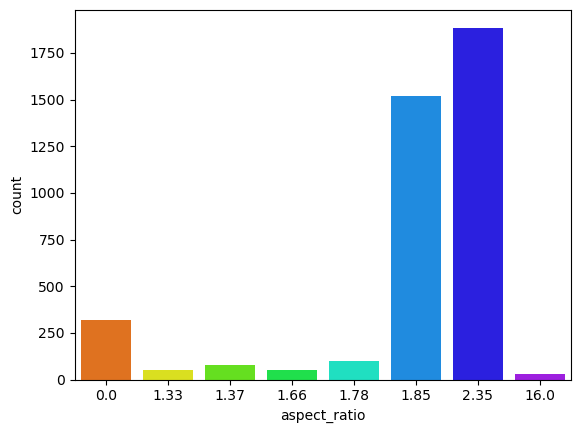

In [57]:
#Count/distribution plot of 'director_name' feature
top_7_ar=list(df['aspect_ratio'].value_counts().nlargest(7).sort_index().index)
sns.countplot(df['aspect_ratio'].apply(lambda x:x if x in top_7_ar else 0),palette=palette_theme)

In [58]:
df_aspect_ratio=df.groupby(['aspect_ratio']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_aspect_ratio.columns=['mean_imdb_rating','frequency']
df_aspect_ratio.reset_index(inplace=True)
df_aspect_ratio

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\3997089398.py:1: FutureWarning: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_aspect_ratio=df.groupby(['aspect_ratio']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)


aspect_ratio  mean_imdb_rating  frequency
0           2.35          6.453446       1886
1           1.85          6.377222       1519
2           1.78          6.191000        100
3           1.37          7.128205         78
4           1.66          7.209615         52
5           1.33          7.190385         52
6          16.00          7.080000         30
7           2.39          6.750000         12
8           2.20          7.420000         10
9           4.00          7.683333          6
10          2.00          6.840000          5
11          2.40          7.233333          3
12          1.75          7.900000          3
13          1.50          7.150000          2
14          2.76          7.750000          2
15          2.55          6.550000          2
16          1.20          7.800000          1
17          2.24          7.600000          1
18          1.77          6.300000          1
19          1.44          7.500000          1
20          1.89          6.300000          1

<AxesSubplot:xlabel='aspect_ratio', ylabel='mean_imdb_rating'>

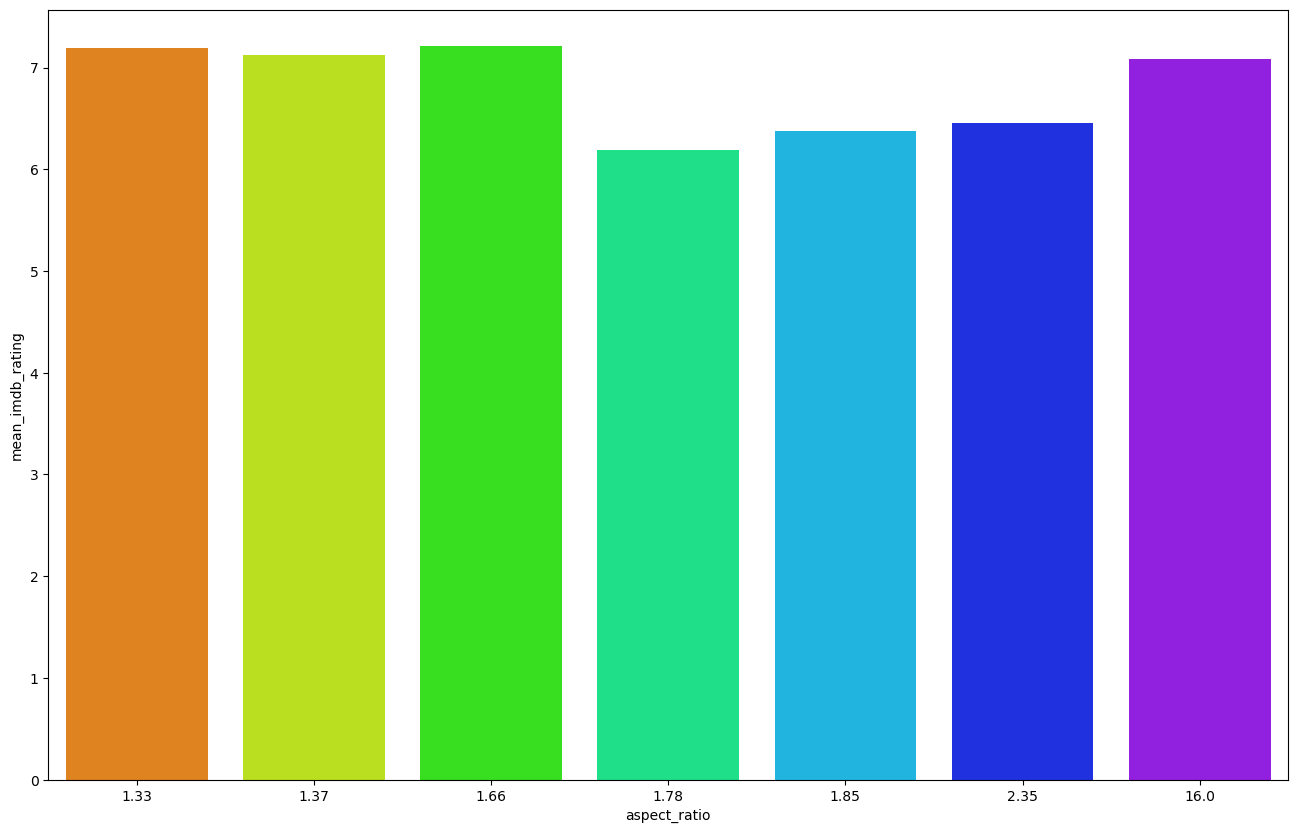

In [59]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="aspect_ratio", y="mean_imdb_rating", ax=ax, data=df_aspect_ratio[:7],palette=palette_theme)

##### Insights
- Most of the movies have aspect ratio of 1.85 or 2.35
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of aspect_ratio

- **Data cleaning step**: There is null value,type=numeric
- **Feature engineering step**: Drop this feature as this seems non-intutive

##### 'duration'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

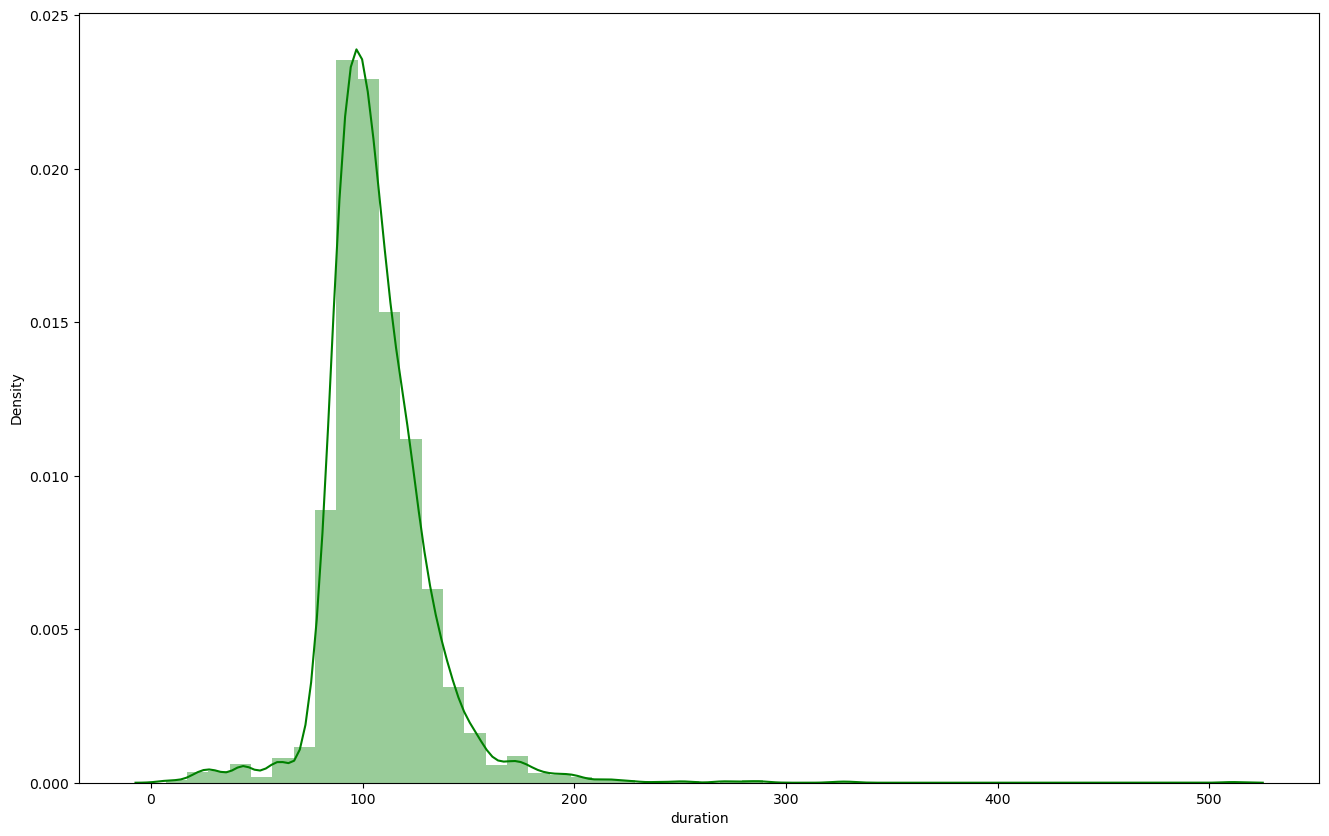

In [60]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['duration'],ax=ax,color='green')

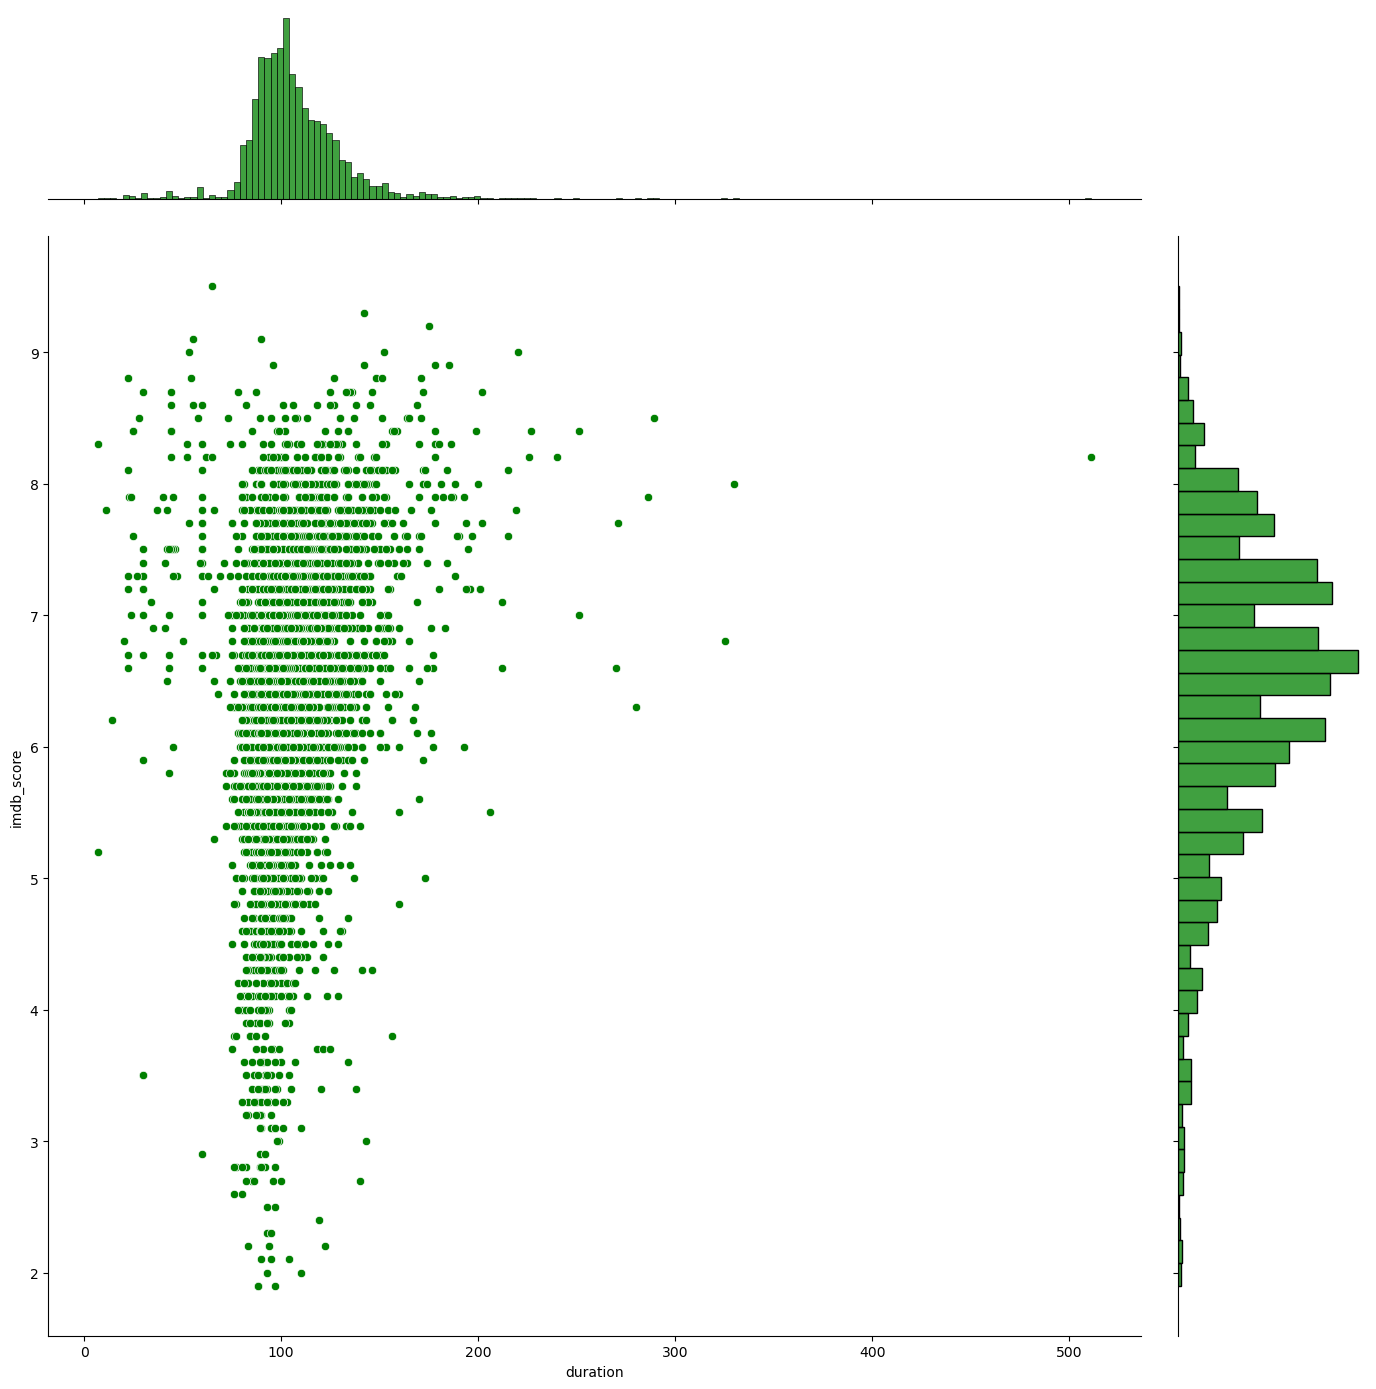

In [61]:
sns.jointplot(x='duration', y='imdb_score',height=14,kind='scatter', data=df,color='green')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

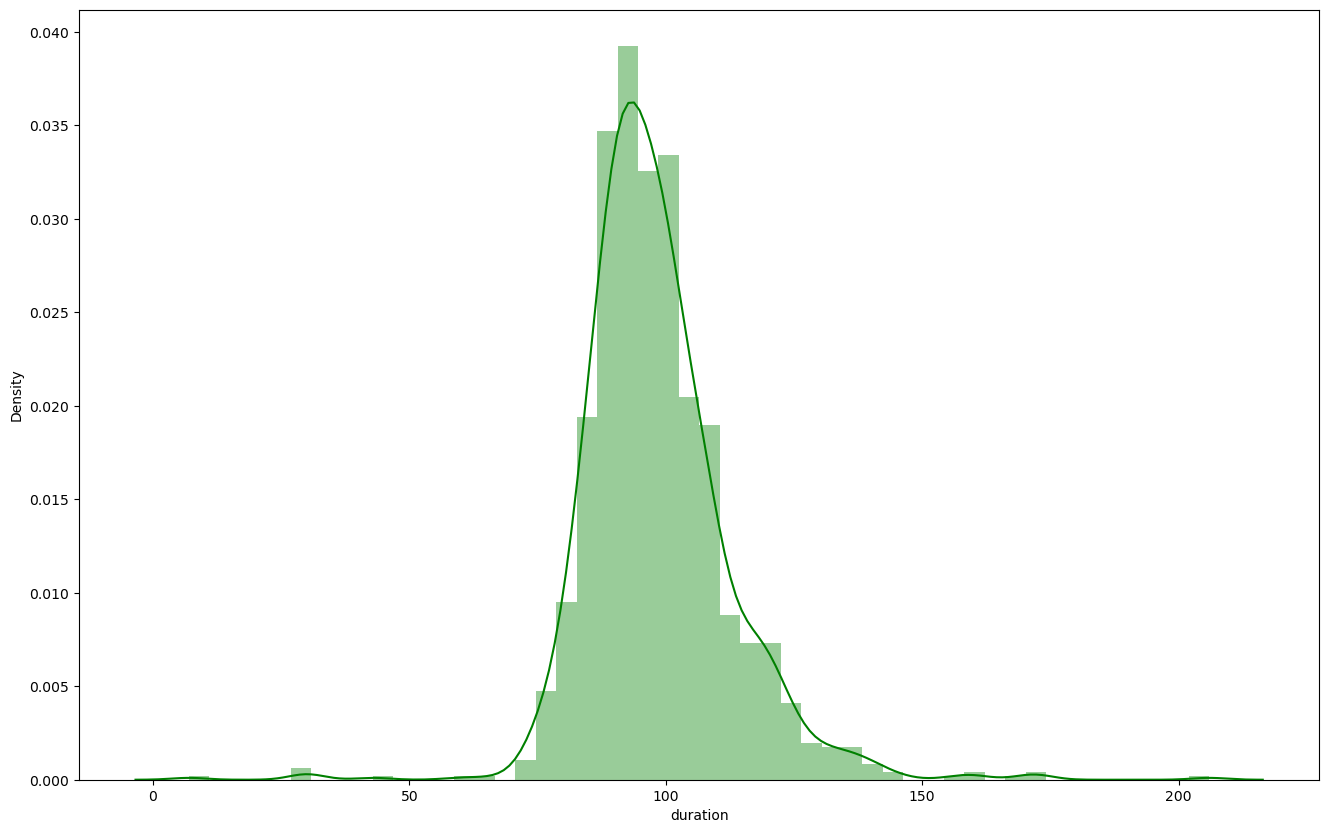

In [62]:
df_low6_imdb_score=df[df['imdb_score']<6]['duration']
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df_low6_imdb_score,ax=ax,color='green')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

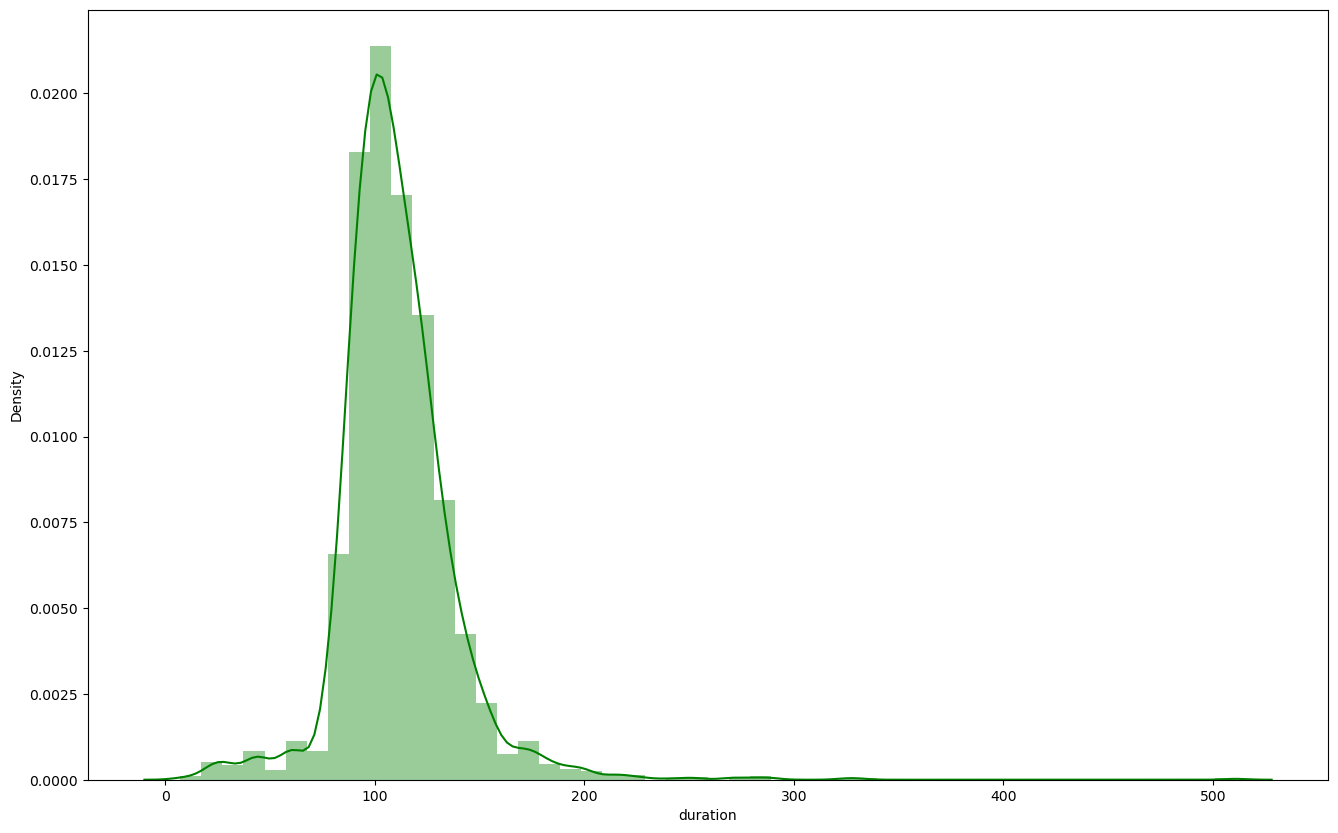

In [63]:
df_low6_imdb_score=df[df['imdb_score']>6]['duration']
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df_low6_imdb_score,ax=ax,color='green')

##### Insights
- Imdb score and duration both have normal distribution centered around 100
- Low imdb_score movies(less than 6) are concentrated around 100 mins #Leptokurtic(thinner tails thannormal distribution)

- **Data cleaning step**: There is null value,type=numeric
- **Feature engineering step**: Drop this feature as there is no general trend or experiment 

#### 'gross'

In [64]:
df['gross'].sort_values()

532           703.0
240           721.0
2136          728.0
1728          828.0
1933         1111.0
3314         1521.0
225          1711.0
1946         2245.0
3834         2436.0
3593         2468.0
3872         2843.0
3375         2874.0
2622         2964.0
165          3330.0
1159         3478.0
2764         3607.0
2445         4063.0
204          4091.0
2569         4556.0
193          4756.0
1369         4958.0
1473         5005.0
309          5199.0
728          5494.0
3363         5561.0
3712         5725.0
3653         5824.0
3868         5858.0
1055         6013.0
3727         6387.0
3167         6643.0
3407         7680.0
3209         7927.0
422          8231.0
3311         8691.0
1130         9213.0
2612         9910.0
448          9950.0
1385        10018.0
154         10443.0
3342        10696.0
660         11278.0
1898        11798.0
88          11835.0
4032        12438.0
8           12561.0
2142        12667.0
535         12836.0
2319        12996.0
736         13134.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross', ylabel='Density'>

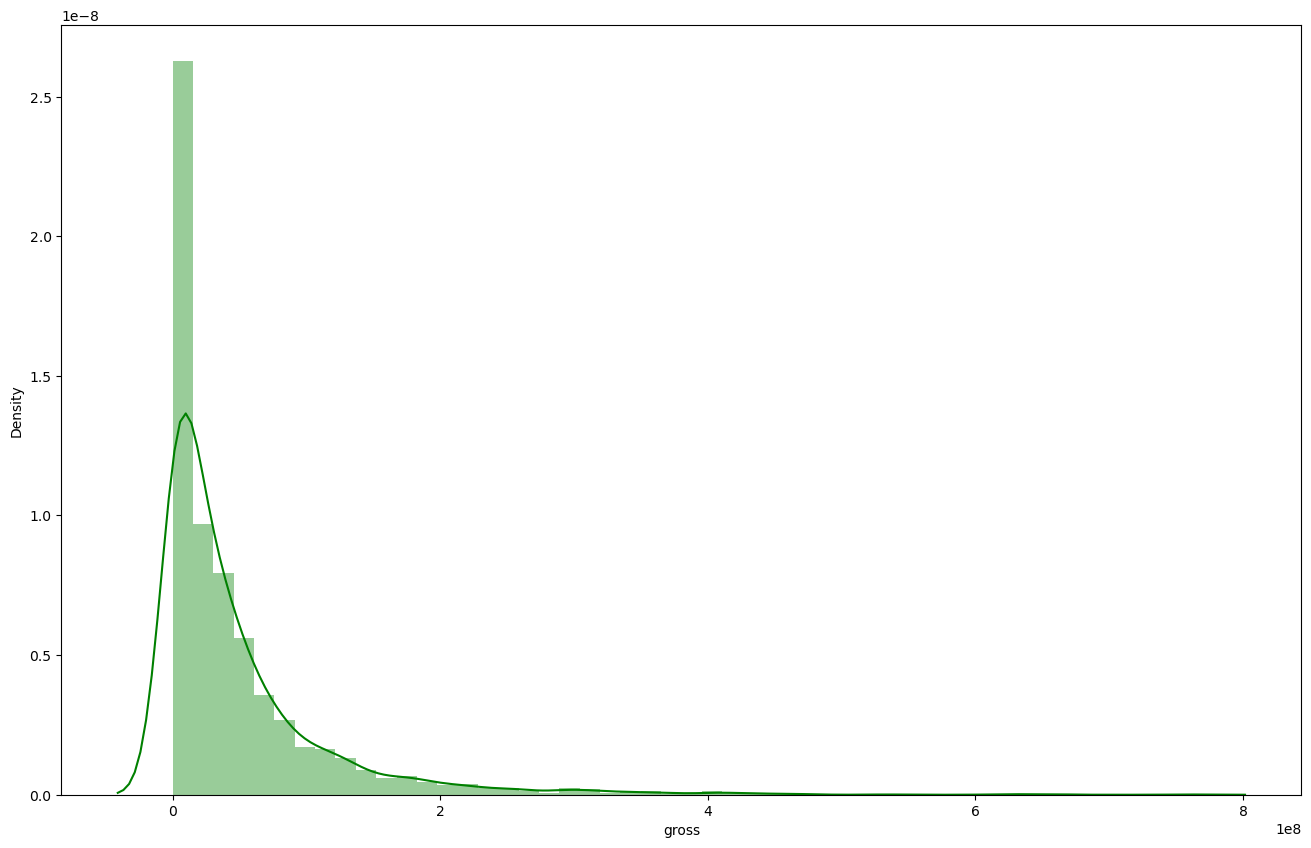

In [65]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['gross'],ax=ax,color='green')

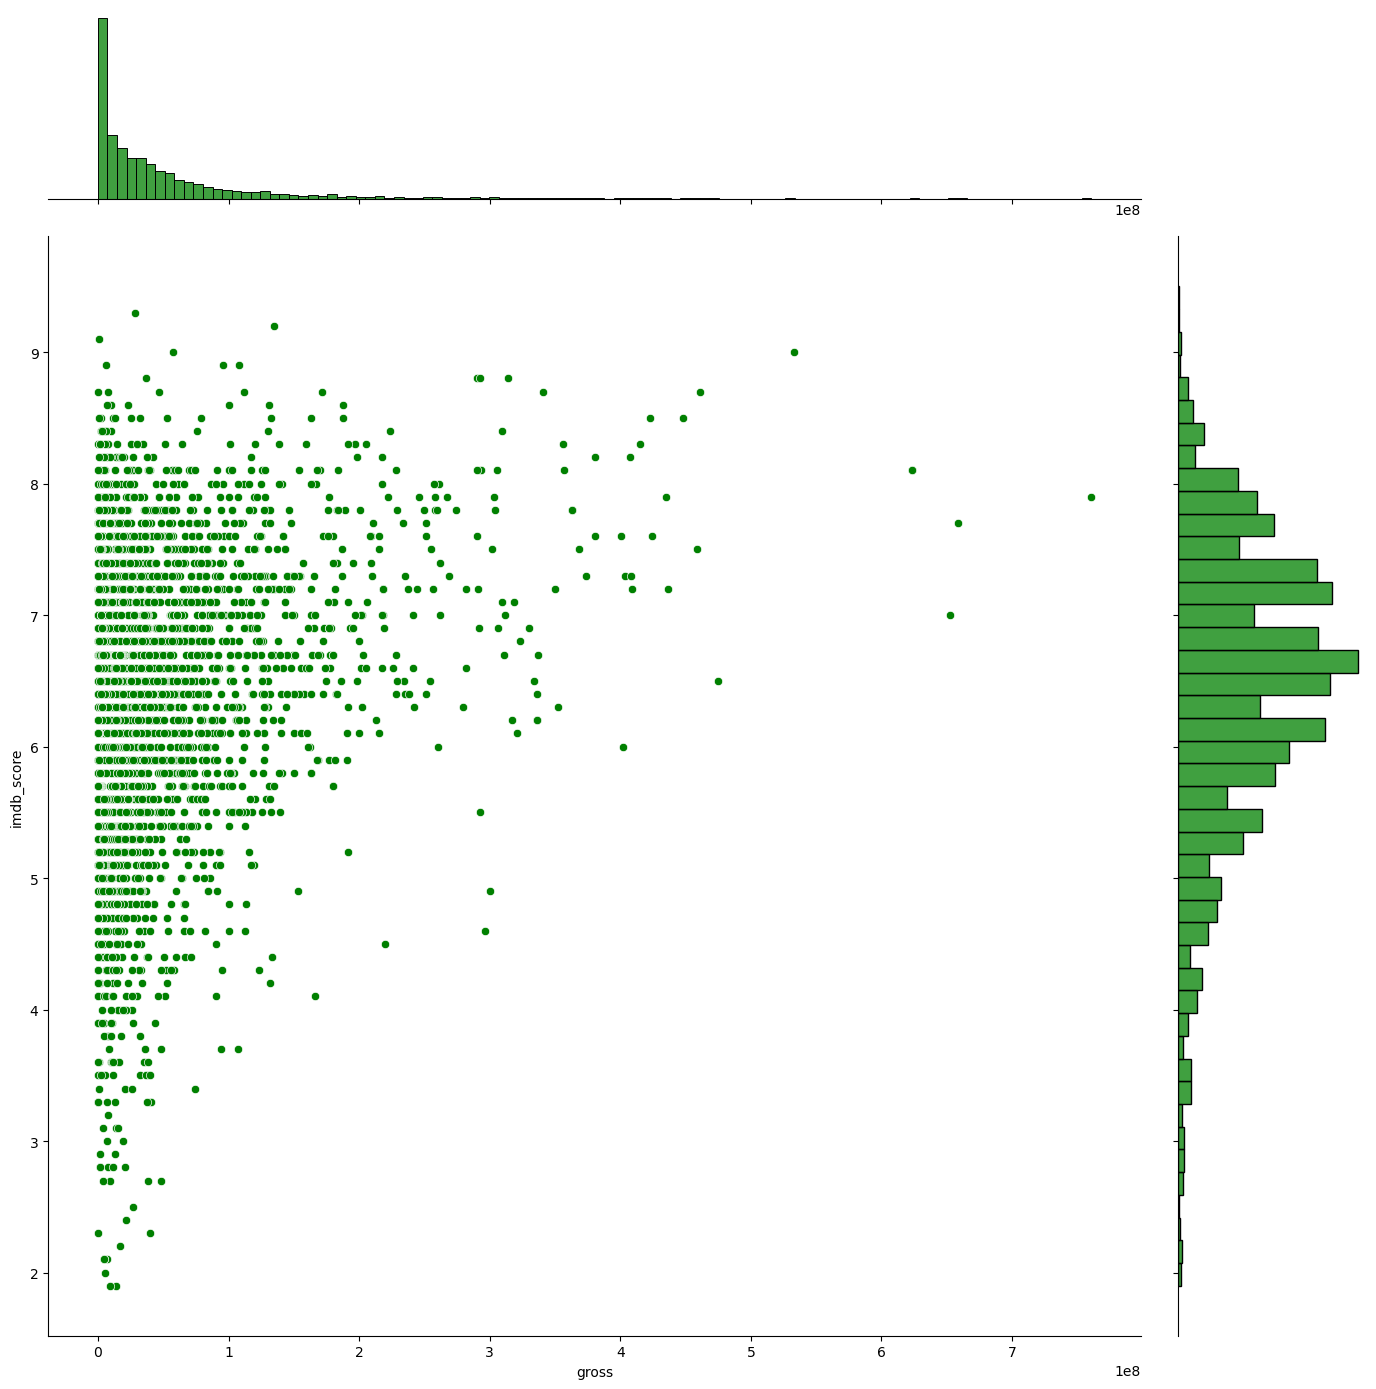

In [66]:
sns.jointplot(x='gross', y='imdb_score',height=14,kind='scatter', data=df,color='green')

In [67]:
df['gross'].mean()/(10000*10000)

0.4795553988832029

##### Insights
- Extremely high grossing movies generally have high imdb_score

- **Data cleaning step**: Gross can be replaced with budget, and remaining missing values can be replaced with  mean gross
- **Feature engineering step**: This seems to be an important factor, new feature [profit] can be created from this

#### 'facenumber_in_poster'

In [68]:
df['facenumber_in_poster'].value_counts()

0.0     1726
1.0      997
2.0      577
3.0      316
4.0      159
5.0       89
6.0       54
7.0       37
8.0       30
9.0       16
10.0       6
11.0       5
15.0       5
12.0       3
13.0       2
19.0       1
31.0       1
Name: facenumber_in_poster, dtype: int64

##### Insights
- Un-intutive to use this variable for modelling

- **Data cleaning step**: None
- **Feature engineering step**: Drop this variable from modelling

#### 'budget'

In [69]:
df.shape

(4034, 29)

In [70]:
sum(df['budget'].isnull())

394

In [71]:
df[df['budget']<np.mean(df['budget'])/10].shape,df[df['budget']<np.mean(df['budget'])*10].shape
#Imputation value for missing nan can be taken as mean

((695, 29), (3631, 29))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

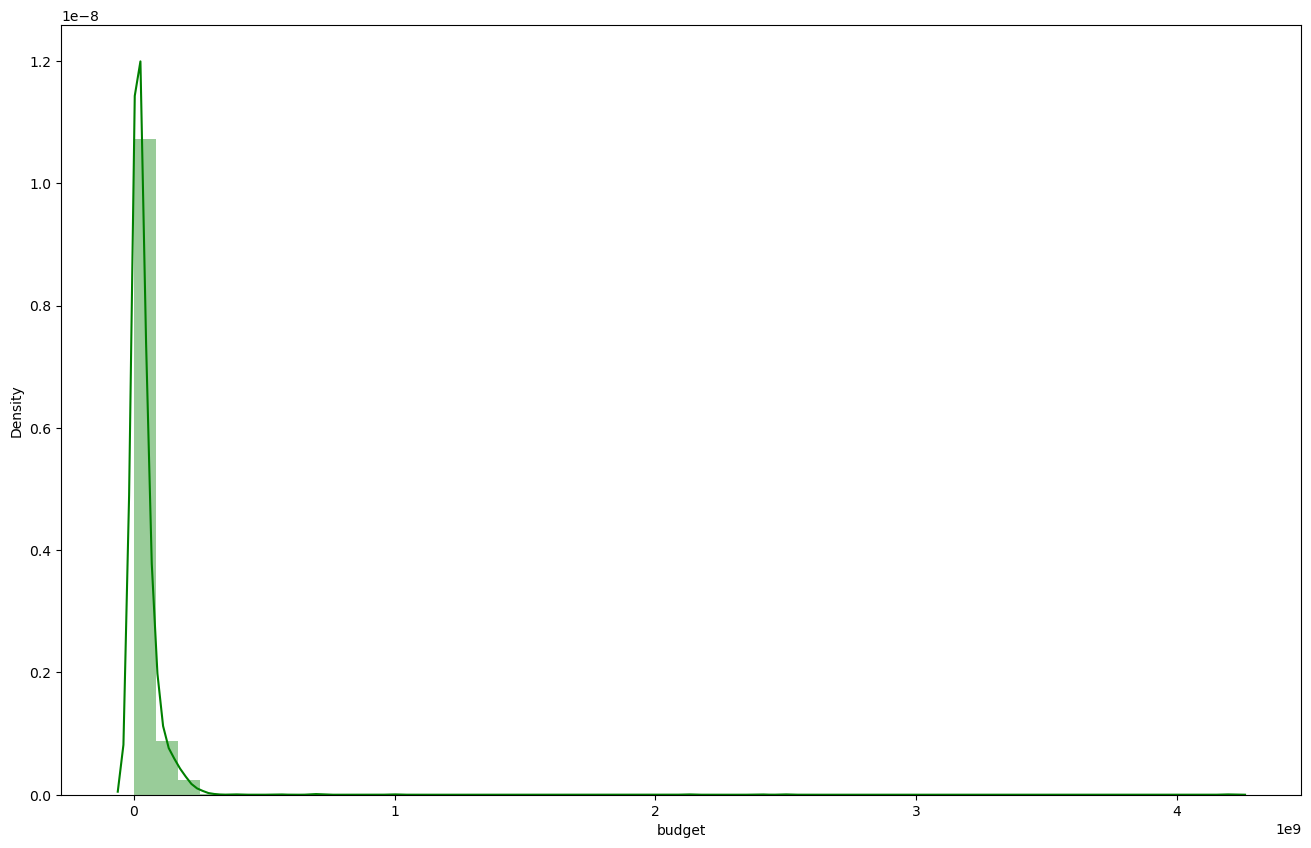

In [72]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['budget'],ax=ax,color='green')

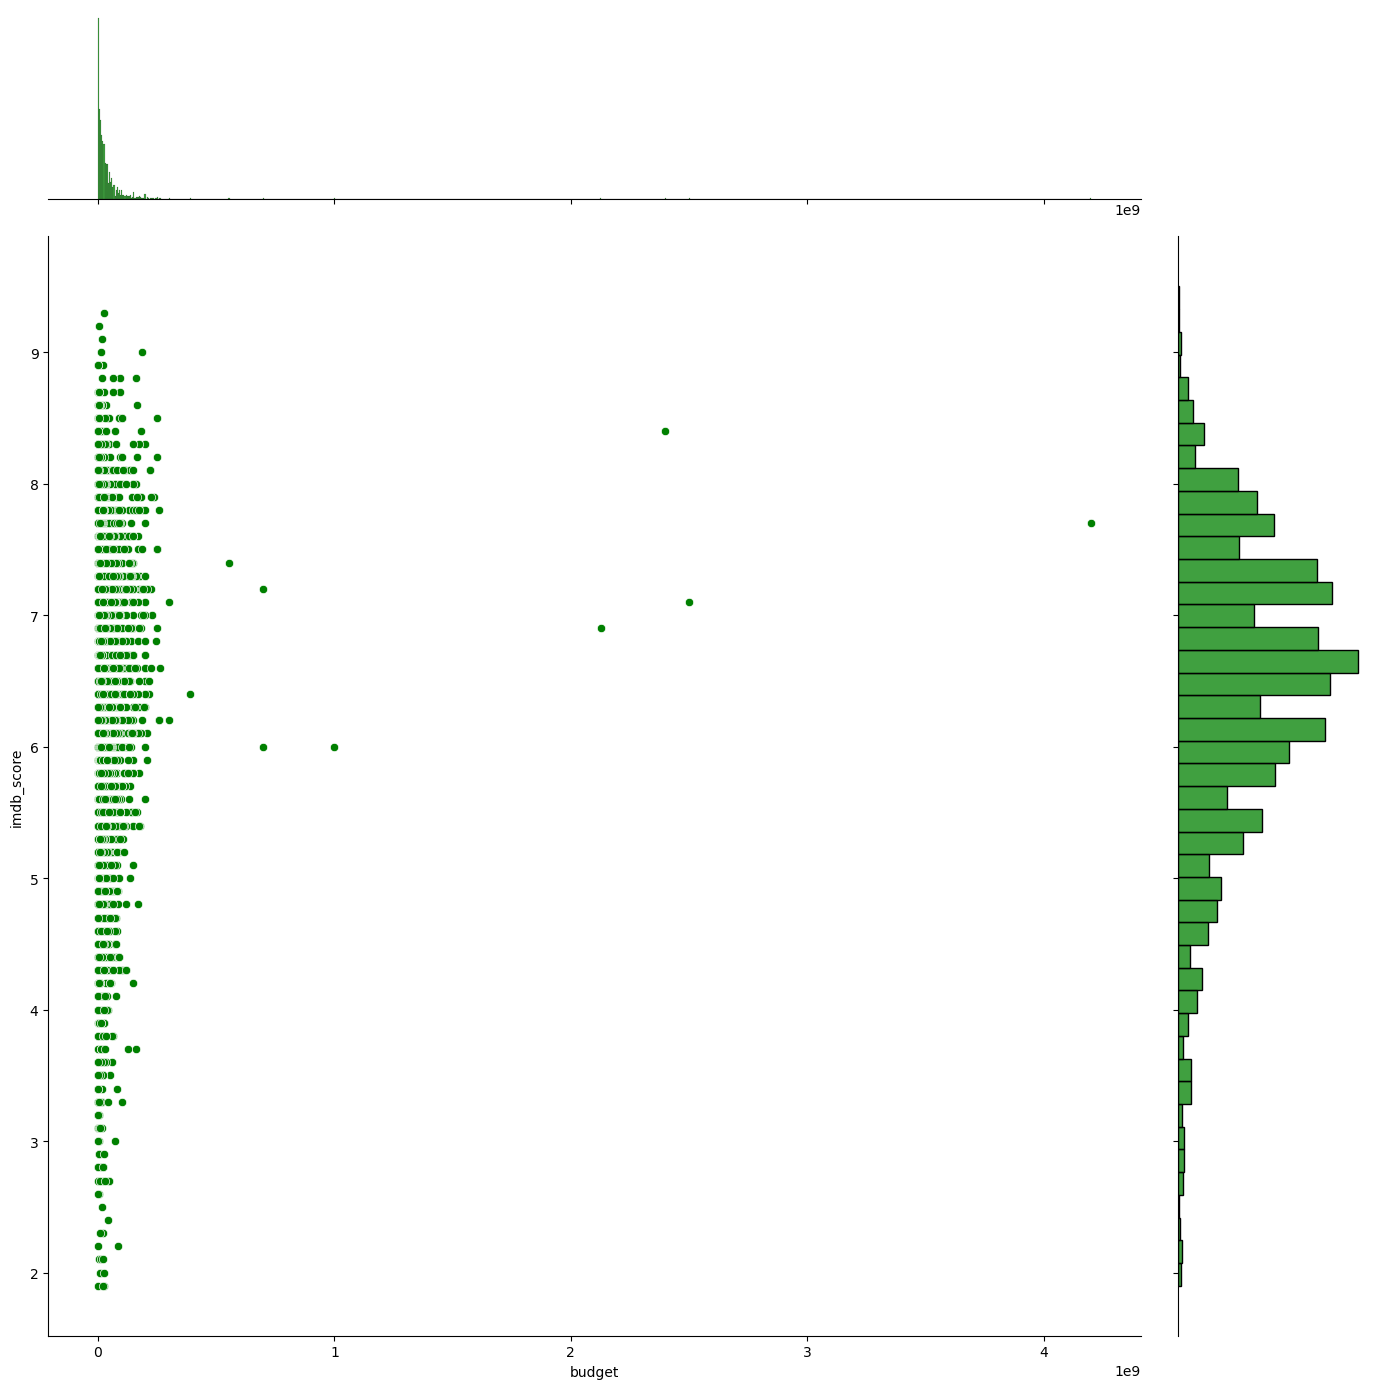

In [73]:
sns.jointplot(x='budget', y='imdb_score',height=14,kind='scatter', data=df,color='green')

##### Insights
- The right tail of the curve is very elongated and thin, this may be because of the outliers. 

- **Data cleaning step**: Remove outliers/ Put a ceiling on the maxing value
- **Feature engineering step**:Create profit feature

#### 'title_year'

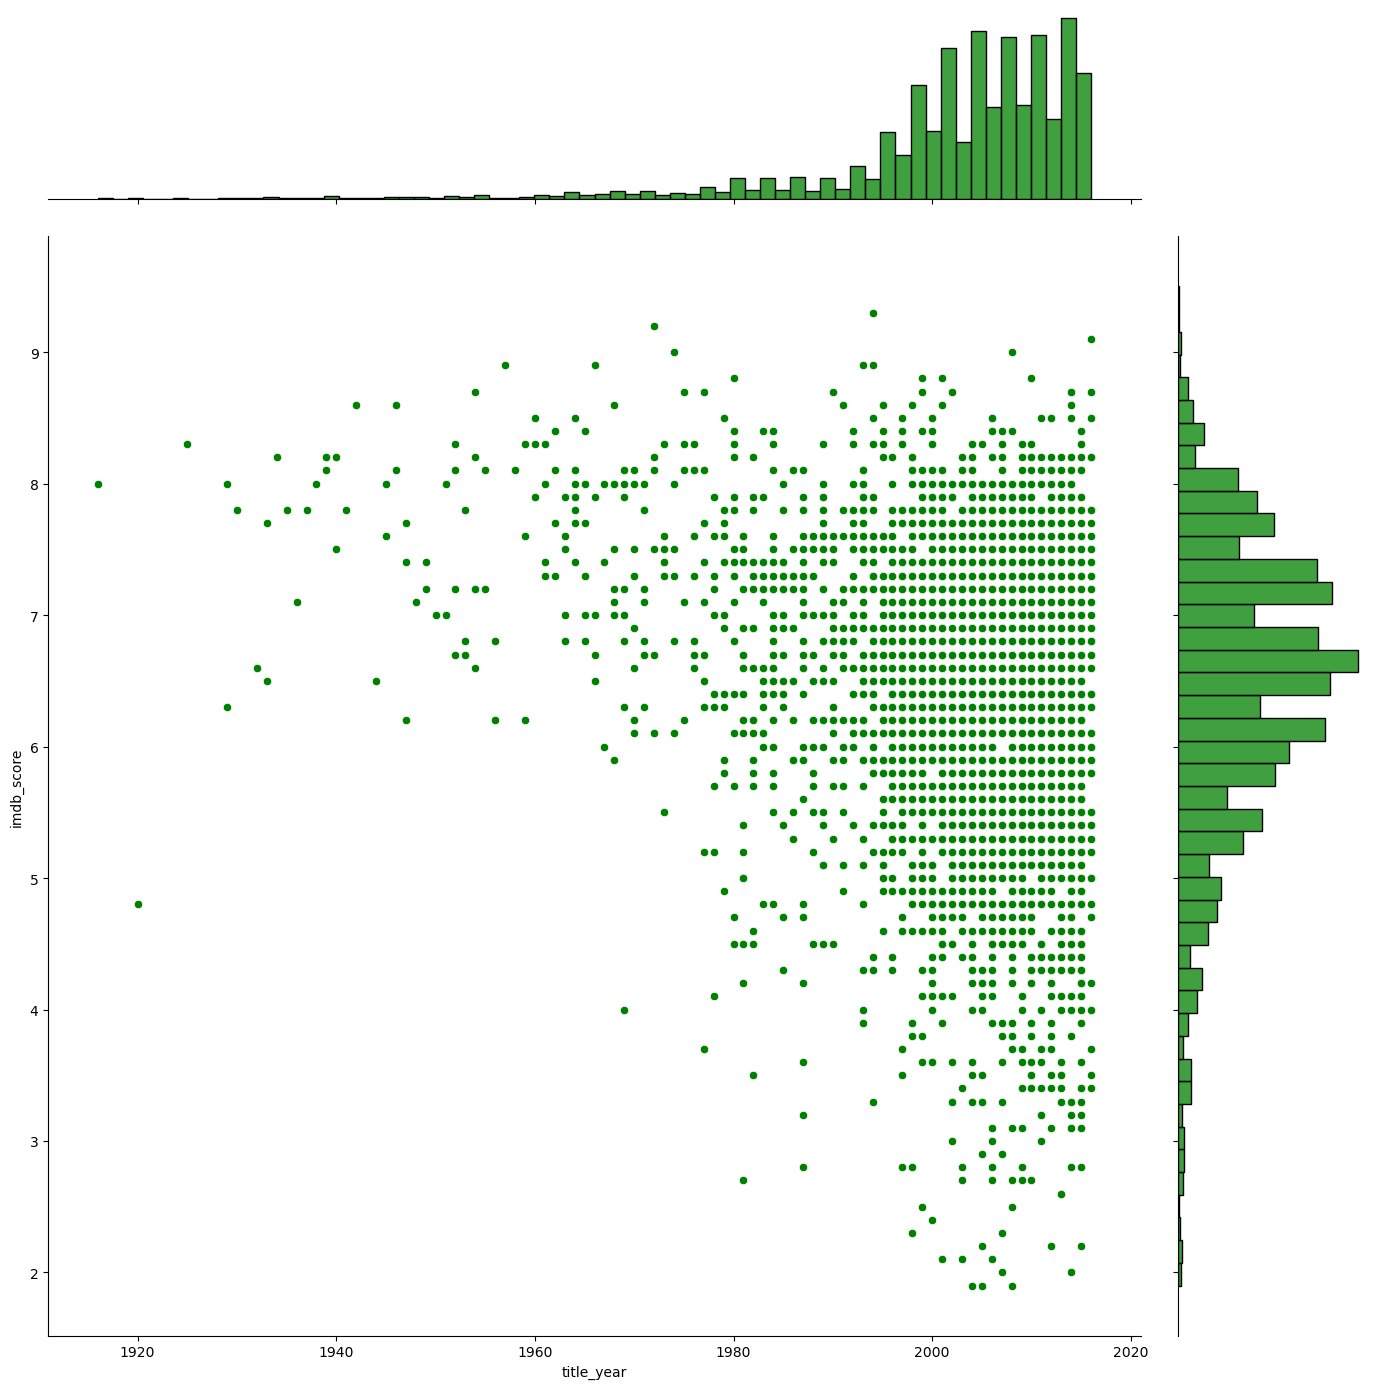

In [74]:
sns.jointplot(x='title_year', y='imdb_score',height=14,kind='scatter', data=df,color='green')

In [75]:
np.mean(df['title_year'])

2002.5679918966828

In [76]:
sum(df['title_year'].isna())

85

##### Insights
- Older movies (less than 1970)generally have rating greater than 5.
- Most of the movies are from last 3 decades.

- **Data cleaning step**: Remove outliers/ Put a ceiling on the maxing value
- **Feature engineering step**:For missing values, mean value of 2002 can be taken

In [77]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### 'director_facebook_likes'

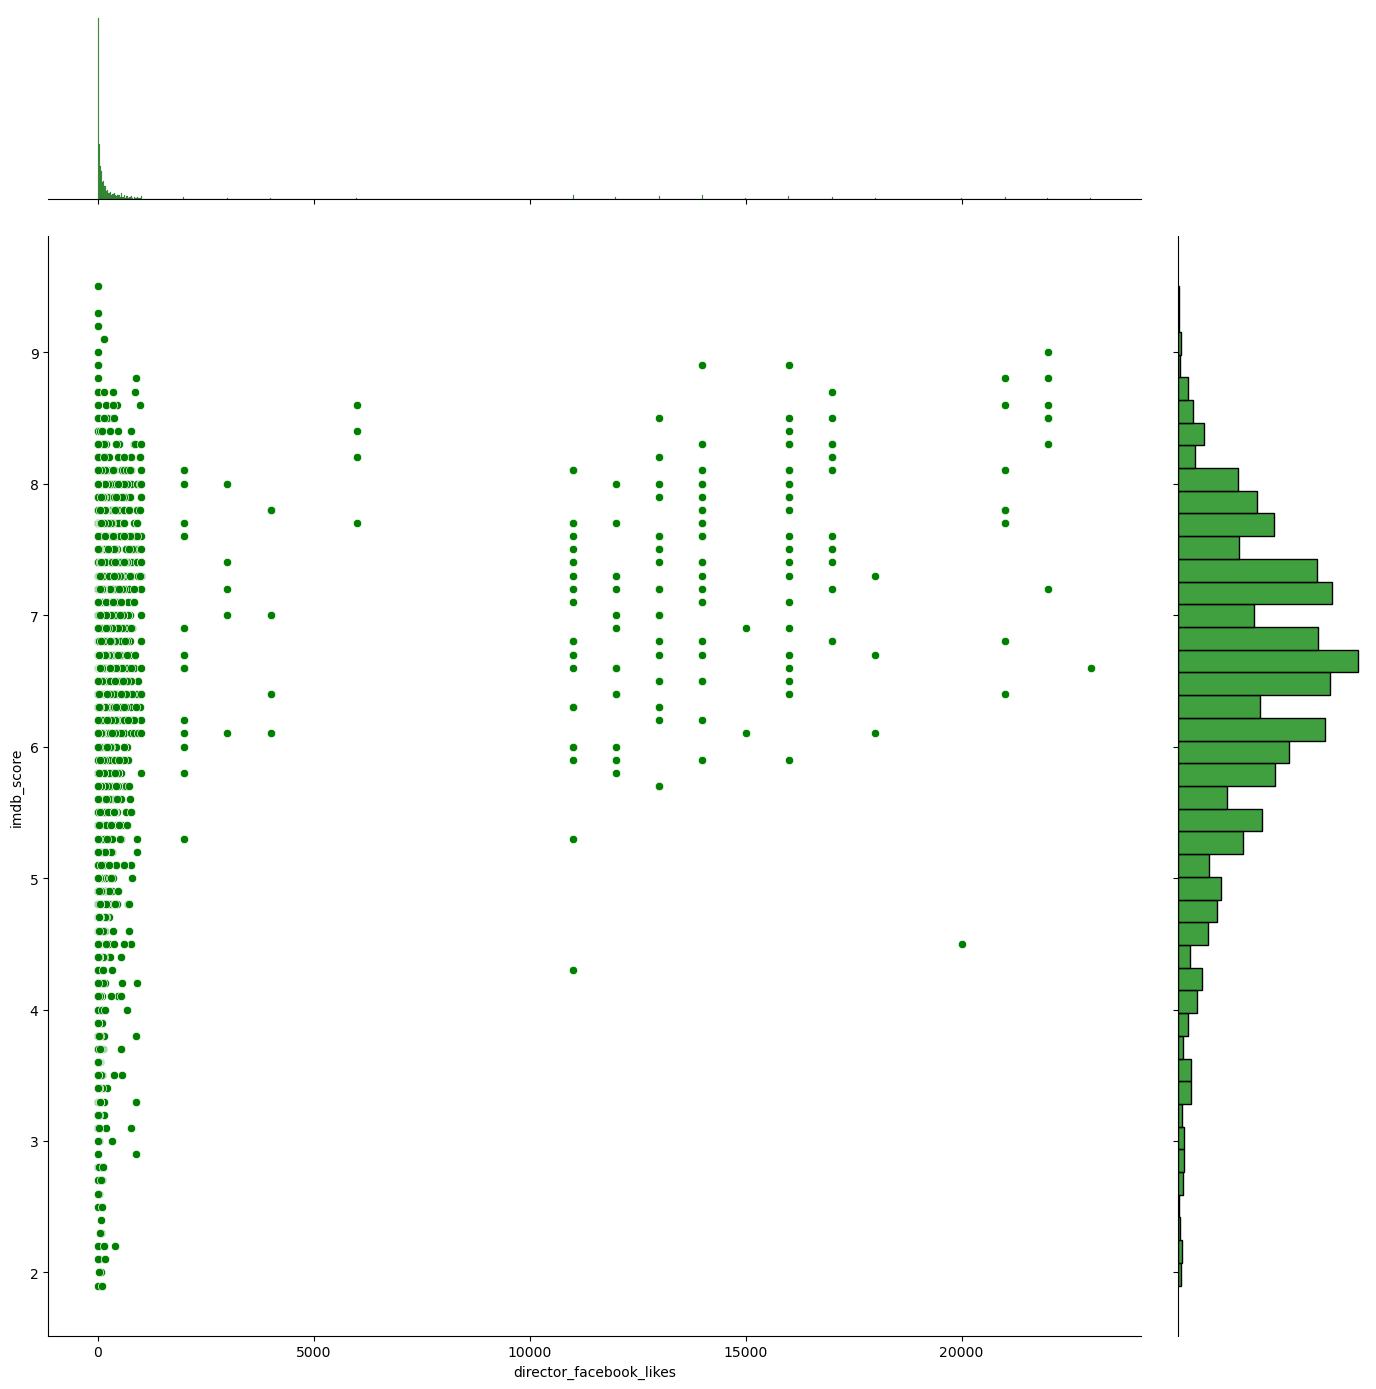

In [78]:
sns.jointplot(x='director_facebook_likes', y='imdb_score',height=14,kind='scatter', data=df,color='green')

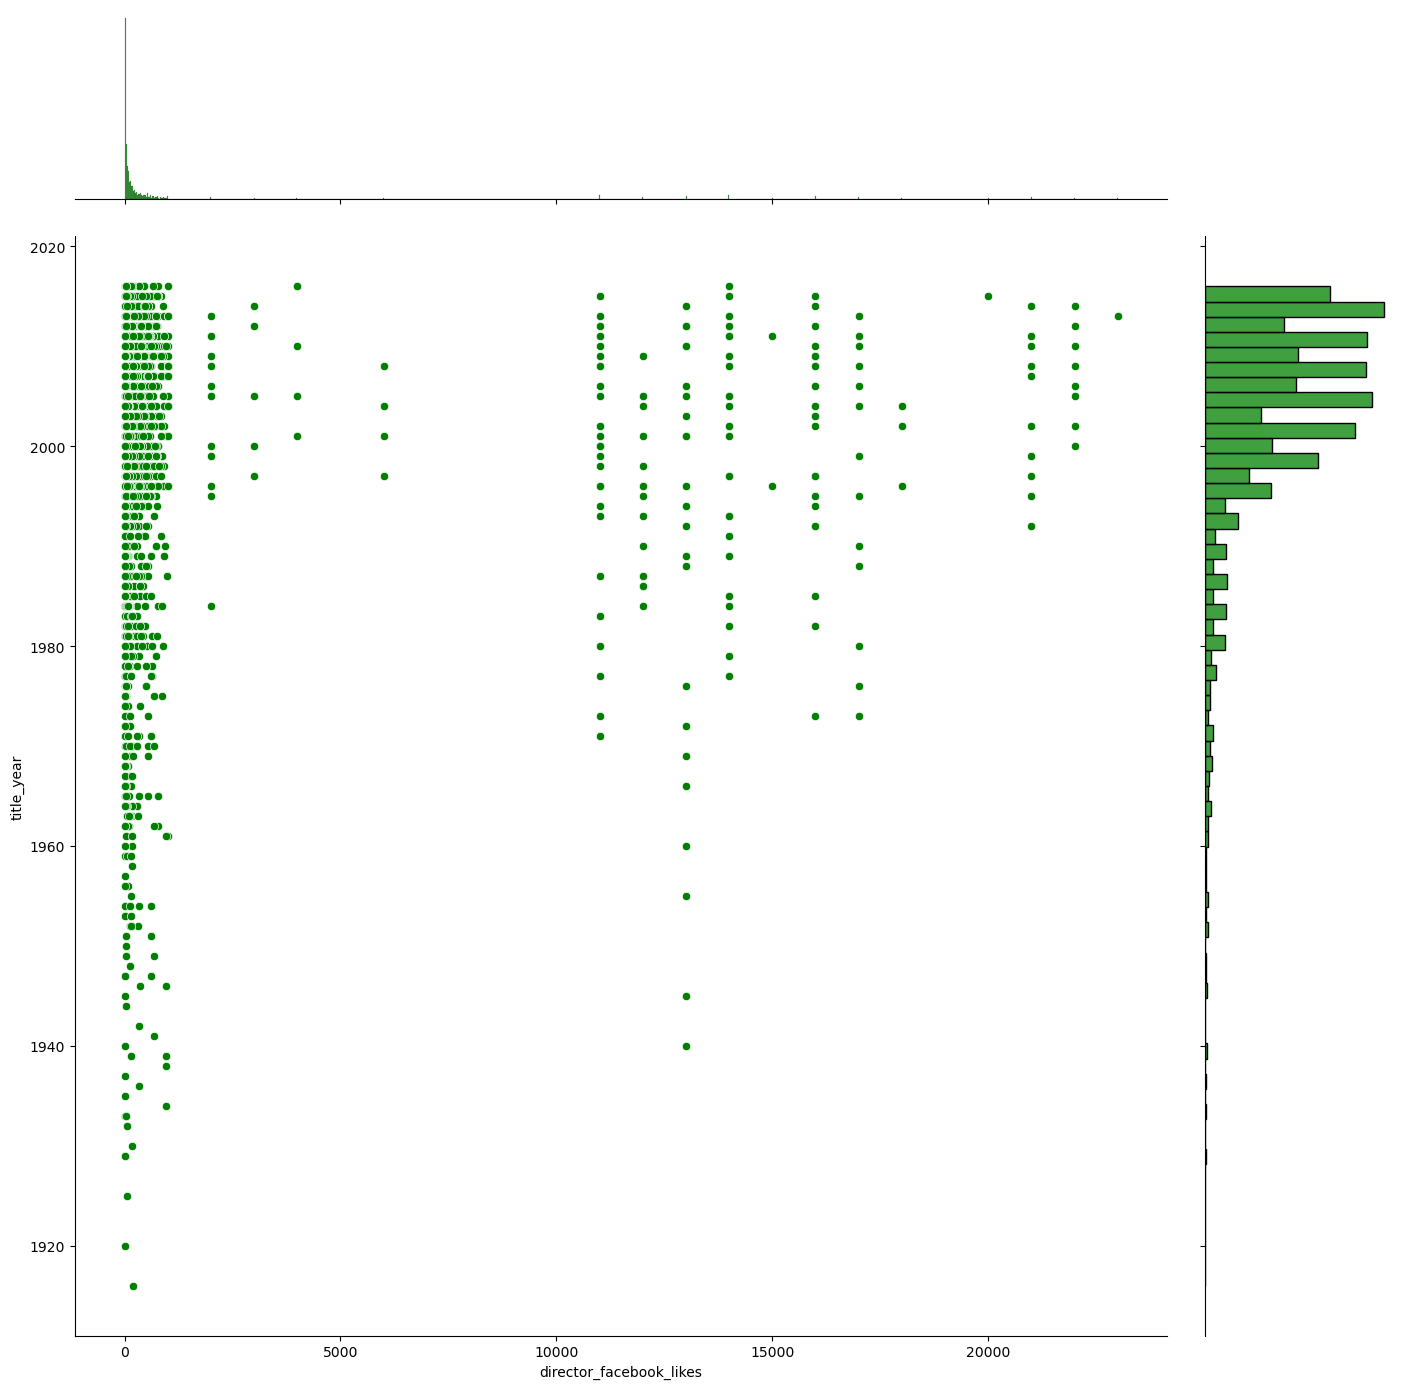

In [79]:
#title year vs likes
sns.jointplot(x='director_facebook_likes', y='title_year',height=14,kind='scatter', data=df,color='green')

In [80]:
np.mean(df['director_facebook_likes'])

716.3207690361751

In [81]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

##### Insights
- The distribution of data is not smooth, and it can be attributed to data authenticity/correctness
- Mean value of like is 716.32 , so the unit of likes may be in 100s or 1000s, again this data doesn't seems to be  correct.

- **Data cleaning step**: Replace value with mean
- **Feature engineering step**:This seems to a very important value intutively for imdb_score

#### 'num_critic_for_reviews'

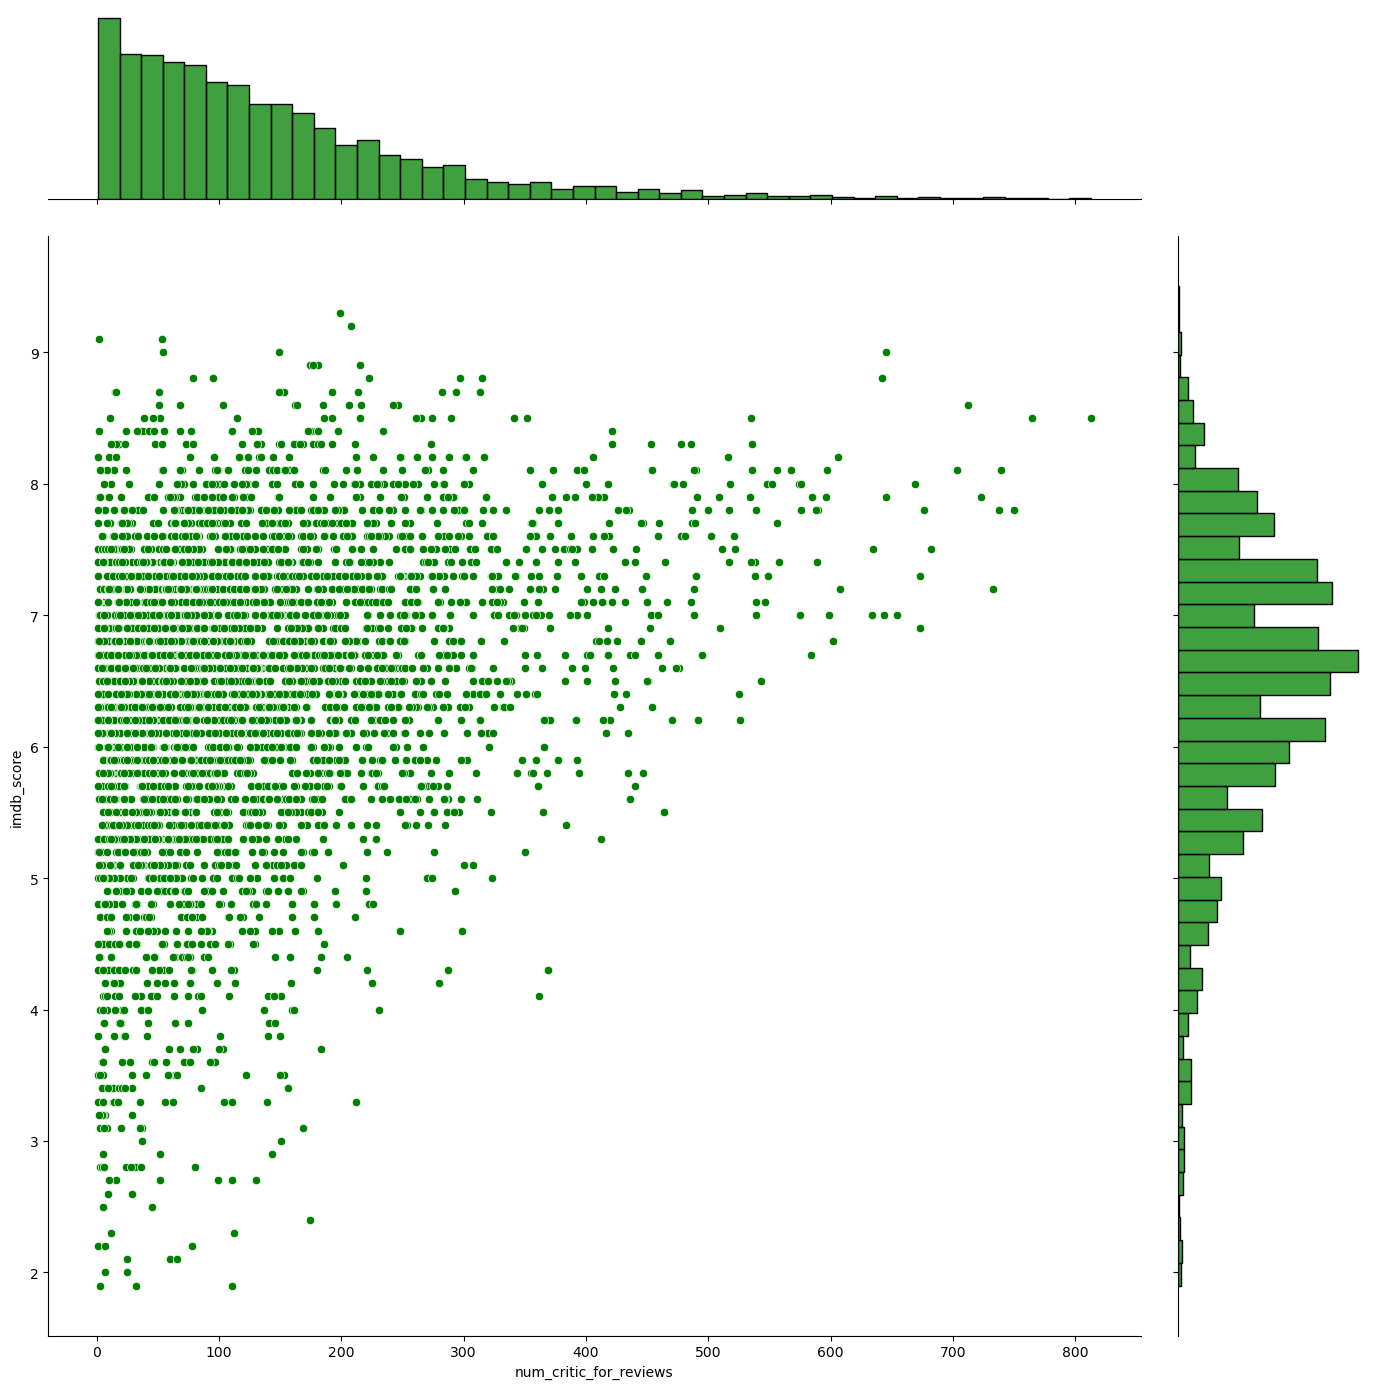

In [82]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score',height=14,kind='scatter', data=df,color='green')

##### Insights
- For high value(above 500) of 'num_critic_for_reviews', 'imdb_score' is greater than 6.


- **Data cleaning step**: Replace value with mean
- **Feature engineering step**:-This seems to a important value  for imdb_score


### (3) Modelling
- #### Data pre-processing
- The functions are created here:
    1. fill_missing_data : 
    2. transform_data 
    3. add_new_feature_to_data
    4. remove_non_intutive_feature(+ non-transformed string features)
    5. remove_correlated_feature

####  3.1 Fill missing data
- Here we will impute for missing value across all features

In [83]:
try:
    df.drop('index',inplace=True,axis=1)
except LookupError:
    print ("Index column is not present in datarame")
else:
    pass

##### Not many rows with too many nan values so no need to drop rows

In [84]:
df[df.isnull().sum(axis=1) < 10].shape,df.shape

((4034, 28), (4034, 28))

#### Approch for filling null values

In [85]:
list(df_percent_null[df_percent_null['percent_null']!=0]['column_name'])

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio']

| Approach      | Features |
| ----------- | ----------- |
| Imputation with mean      | 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',      |
| Custom approch  (using replace_with_budget function) | 'gross'  |
|MICE|'budget'|
| Not considering as it will be dropped later|'aspect_ratio','facenumber_in_poster'|

In [86]:
def replace_with_budget(row,mean_gross,adjusted_mean_profit_percent):
    if(pd.isna(row['gross'])):
        if(not pd.isna(row['budget'])):
            return row['budget']*(1+adjusted_mean_profit_percent)
    else:
        return mean_gross
    
    
#On an average a company makes 367% times the budget
mean_profit_percentage=np.mean((df['gross']-df['budget'])/df['budget'])
print('mean_profit_percentage: ',mean_profit_percentage)
adjusted_mean_profit_percent=mean_profit_percentage/2
print('adjusted_mean_profit_percent: ',adjusted_mean_profit_percent)

mean_profit_percentage:  3.6704769257910654
adjusted_mean_profit_percent:  1.8352384628955327


In [87]:
mean_imputation_list=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes']
addition_information_required={   }
for col in mean_imputation_list:
    addition_information_required['mean_'+col]=np.mean(df[col])
addition_information_required['mean_gross']=np.mean(df['gross'])
addition_information_required['adjusted_mean_profit_percent']=adjusted_mean_profit_percent
addition_information_required['mean_df_train_budget']=np.mean(df['budget'])

In [88]:
# Data cleaning from above observations:
# Here we will impute all the missing data
# Data transformation: categorical to numerical will be done later
def data_cleaning(df,addition_information_required):
    #color
    df['color']=df['color'].replace({'nan':'color'})

    #language
    df['language']=df['language'].apply(lambda x: x if x=='english' else 'non_english')
    df['gross']=df.apply(lambda x: replace_with_budget(x,addition_information_required['mean_gross'],addition_information_required['adjusted_mean_profit_percent']),axis=1)
    
    for col in mean_imputation_list:
        df[col].fillna(np.mean(df[col]))
    
    ## Using MICE:
    #!pip install fancyimpute 
    #Unable to install mice related libraries
    
    df['budget']=addition_information_required['mean_df_train_budget']
    return df

In [89]:
df=data_cleaning(df,addition_information_required)

In [90]:
df_unseen=data_cleaning(df_unseen,addition_information_required)

In [91]:
df.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews        42
duration                      14
director_facebook_likes       81
actor_3_facebook_likes        21
actor_2_name                   0
actor_1_facebook_likes         7
gross                        179
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          10
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews          20
language                       0
country                        0
content_rating                 0
budget                         0
title_year                    85
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 267
movie_facebook_likes           0
dtype: int64

In [92]:
df_unseen.isnull().sum()

color                         0
director_name                 0
num_critic_for_reviews        8
duration                      1
director_facebook_likes      23
actor_3_facebook_likes        2
actor_2_name                  0
actor_1_facebook_likes        0
gross                        45
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          3
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          1
language                      0
country                       0
content_rating                0
budget                        0
title_year                   23
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 62
movie_facebook_likes          0
dtype: int64

#### 3.2 transform_data

In [93]:
sorted(obj_columns)

['actor_1_name',
 'actor_2_name',
 'actor_3_name',
 'color',
 'content_rating',
 'country',
 'director_name',
 'genres',
 'language',
 'movie_imdb_link',
 'movie_title',
 'plot_keywords']

#### Variables consdered for transform_data (categorical_data)
1. 'color': One hot encoding 
2. 'content_rating'
    #Lets create few categorical column
    1. pg Parental guide pg/pg-13/tv-pg
    2. g general g/tv-g
    3. R 
    4. Others
3. 'actor_1_name','actor_2_name','actor_2_name':
    Later
4. 'language': One hot encoding of english and non-english
5. 'director_name'
    Later
6. 'country': One hot encoding {'us' or non_us}
7. 'genres':
    1. top_5_genres (5 columns)
8. 'movie_imdb_link':Will be dropped
9.  'movie_title': Will be dropped
10. 'plot_keywords':Will be dropped

In [94]:
def transform_data(df):
    #color
    df['color']=df['color'].apply(lambda x:1 if x=='color' else 0)
    #Add content_rating related columns
    replace_dict_content_rating={
        'r':'content_rating_r',
        'pg-13':'content_rating_pg',
        'pg':'content_rating_pg',
        'nan':'content_rating_other',
        'g':'content_rating_g',
        'not rated':'content_rating_other',
        'unrated':'content_rating_other',
        'approved':'content_rating_other',
        'tv-14':'content_rating_other',
        'tv-ma':'content_rating_other',
        'x':'content_rating_other',
        'tv-pg':'content_rating_pg',
        'tv-g':'content_rating_g',
        'passed':'content_rating_other',
        'nc-17':'content_rating_other',
        'gp':'content_rating_other',
        'm':'content_rating_other',
        'tv-y':'content_rating_other',
        'tv-y7':'content_rating_other',
    }
    df['content_rating']=df['content_rating'].replace(replace_dict_content_rating)
    df=pd.concat([df, pd.get_dummies(df['content_rating'],  dummy_na=False,)],axis=1)
    #language
    df['language']=df['language'].apply(lambda x :1 if x=='english' else 0)
    #'country'
    df['country']=df['country'].apply(lambda x: 1 if x=='usa' else 0)
    #Add top 5 genres: See insights earlier ['']
    top_5_genre=['drama','comedy']
    
    for genre in top_5_genre:
        df['genre_'+genre]=df['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)
    
    df.drop(['movie_imdb_link','movie_title','plot_keywords','content_rating'],axis=1,inplace=True)
    return df

In [95]:
df['color'].value_counts().reset_index()

index  color
0             color   3873
1   black and white    161

In [96]:
df=transform_data(df)
df_unseen=transform_data(df_unseen)

#### Feature engineering
- 1. Additional feature creation- which represent information in better format
- 2. Removing nonintutive features
- 3. Feature elimination

#### 3.1 Creating new features

In [97]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'content_rating_g',
       'content_rating_other', 'content_rating_pg', 'content_rating_r',
       'genre_drama', 'genre_comedy'],
      dtype='object')

##### On the basis of above analysis we will add the following features
- 1. Profit
- 2. 'actor_1_name','actor_2_name','actor_2_name':
    1. name in top_50_actor_1/2/3 by frequency list
- 3. 'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'
    1. Popular_50_actor
    2. Total likes ('actor_1_facebook_likes'+'actor_2_facebook_likes'+'actor_3_facebook_likes')
- 3. 'director_name'
    1. Frequency_director(top 30)
- 4. 'director_facebook_likes' 
    1. Popular_30_director

In [98]:
## Utility/helper functions

def popular_actor_likes_cutoff_fn(df):
    #Most popular actor top 30 by number of movies
    df_actor_1=df[['actor_1_name','actor_1_facebook_likes']].rename(columns={'actor_1_name':'actor_name','actor_1_facebook_likes':'actor_facebook_likes'})
    df_actor_2=df[['actor_2_name','actor_2_facebook_likes']].rename(columns={'actor_2_name':'actor_name','actor_2_facebook_likes':'actor_facebook_likes'})
    df_actor_3=df[['actor_3_name','actor_3_facebook_likes']].rename(columns={'actor_3_name':'actor_name','actor_3_facebook_likes':'actor_facebook_likes'})
    df_actor_temp=df_actor_1.append(df_actor_2).append(df_actor_3)
    df_actor_temp=df_actor_temp.drop_duplicates()

    top_70_likes=[val for val in sorted(df_actor_temp['actor_facebook_likes'],reverse=True)[:71] if val !='nan']
#     print(top_70_likes)
    #Let's set the cutoff at 12000
    return 12000

def popular_director_likes_cutoff_fn(df):
    df_dir_temp=df[['director_name','director_facebook_likes']]
    df_dir_temp=df_dir_temp.drop_duplicates()
    top_30_likes=[col for col in sorted(df_dir_temp['director_facebook_likes'],reverse=True)[:31]if col!='nan']
    #Lets set the cutoff at 400
#     print(top_30_likes)
    return 187

def top_frequent_50_actor_fn(df):
    #Most frequent actor top 50 by number of movies
    all_actor_list=df['actor_1_name'].append(df['actor_2_name']).append(df['actor_3_name'])
    frequent_50_actor_list=[col for col in all_actor_list.value_counts().nlargest(51).index if col!='nan']# Also removing 'nan'
    return frequent_50_actor_list 

def top_frequent_50_director_fn(df_series_director_name):
    frequent_50_director_list=[col for col in df_series_director_name.value_counts().nlargest(51).index if col!='nan']
    return frequent_50_director_list

In [99]:
top_frequent_50_actor=top_frequent_50_actor_fn(df[['actor_1_name','actor_2_name','actor_3_name']])
top_frequent_50_director=top_frequent_50_director_fn(df['director_name'])

popular_actor_likes_cutoff=popular_actor_likes_cutoff_fn(df)
popular_director_likes_cutoff=popular_director_likes_cutoff_fn(df)

dict_n_actor_dir={
    'top_frequent_50_actor':top_frequent_50_actor,
    'popular_actor_likes_cutoff':popular_actor_likes_cutoff,
    
    'top_frequent_50_director':top_frequent_50_director,
    'popular_director_likes_cutoff':popular_director_likes_cutoff

}

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\3193329495.py:26: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_actor_list=df['actor_1_name'].append(df['actor_2_name']).append(df['actor_3_name'])
C:\Users\ANUJ\AppData\Local\Temp\ipykernel_5688\3193329495.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_actor_temp=df_actor_1.append(df_actor_2).append(df_actor_3)


In [100]:
# Actual/main functions used in apply
def check_top_frequent_actor(row,top_frequent_50_actor):
#     print(row)
    cast_names=[row['actor_1_name'],row['actor_2_name'],row['actor_3_name']]
    common_names=[actor_name for actor_name in cast_names if actor_name in top_frequent_50_actor]
    if(len(common_names)>1):
        return 1
    else:
        return 0
def check_top_frequent_director(row,top_frequent_50_director):
    if(row['director_name'] in top_frequent_50_director):
        return 1
    else:
        return 0
    
def check_popular_actor(row,popular_actor_likes_cutoff):
    if(max(row['actor_1_facebook_likes'],row['actor_2_facebook_likes'],row['actor_3_facebook_likes'])>=popular_actor_likes_cutoff):
        return 1
    else:
        return 0

def check_popular_director(row,popular_director_likes_cutoff):
    if(row['director_facebook_likes']>=popular_director_likes_cutoff):
        return 1
    else:
        return 0

In [101]:
def add_new_feature_to_data(df,dict_n_actor_dir):
    df['profit']=df['gross']-df['budget']
    df['frequent_actor']=df.apply(lambda x:check_top_frequent_actor(x,dict_n_actor_dir['top_frequent_50_actor']),axis=1 )#Boolean feature if s/he is in popular actors/ess
    df['frequent_director']=df.apply(lambda x: check_top_frequent_director(x,dict_n_actor_dir['top_frequent_50_director']),axis=1)#Boolean feature if s/he is in top director
    
    df['popular_actor']=df.apply(lambda x: check_popular_actor(x,dict_n_actor_dir['popular_actor_likes_cutoff']),axis=1)#Boolean feature if s/he is in top actors/ess
    df['popular_director']=df.apply(lambda x:check_popular_director(x,dict_n_actor_dir['popular_director_likes_cutoff']),axis=1)#Boolean feature if s/he is in top director
    df['total_actor_likes']=df['actor_1_facebook_likes']+df['actor_2_facebook_likes']+df['actor_3_facebook_likes']
    return df

In [102]:
df=add_new_feature_to_data(df,dict_n_actor_dir)
df_unseen=add_new_feature_to_data(df_unseen,dict_n_actor_dir)

In [103]:
df.head()

color     director_name  num_critic_for_reviews  duration  \
0      1      oliver stone                   242.0     129.0   
1      1  denis villeneuve                   226.0     139.0   
2      1        ron howard                   185.0     111.0   
3      1   alexander payne                   549.0     115.0   
4      1     harold becker                    79.0     111.0   

   director_facebook_likes  actor_3_facebook_likes               actor_2_name  \
0                      0.0                   655.0                scott glenn   
1                    777.0                    58.0  mélissa désormeaux-poulin   
2                   2000.0                   244.0               clint howard   
3                    729.0                   552.0                nick krause   
4                     17.0                   652.0                miko hughes   

   actor_1_facebook_likes         gross                       genres  \
0                  2000.0  4.795554e+07      biography|drama|history   
1                   131.0  4.795554e+07            drama|mystery|war   
2                 17000.0  4.795554e+07                 comedy|drama   
3                  8000.0  4.795554e+07                 comedy|drama   
4                 13000.0  4.795554e+07  action|crime|drama|thriller   

       actor_1_name  num_voted_users  cast_total_facebook_likes  \
0        toby jones            40941                       4264   
1      lubna azabal            80429                        343   
2    channing tatum            43709                      18510   
3  shailene woodley           205284                       9578   
4      bruce willis            54314                      16536   

     actor_3_name  facenumber_in_poster  num_user_for_reviews  language  \
0    bruce mcgill                   1.0                 320.0         1   
1    ahmad massad                   0.0                 156.0         0   
2    chelcie ross                   2.0                 141.0         1   
3    beau bridges                   0.0                 439.0         1   
4  carrie preston                   1.0                 127.0         1   

   country        budget  title_year  actor_2_facebook_likes  imdb_score  \
0        1  3.698728e+07      2008.0                   826.0         6.4   
1        0  3.698728e+07      2010.0                    66.0         8.2   
2        1  3.698728e+07      2011.0                  1000.0         5.3   
3        1  3.698728e+07      2011.0                   727.0         7.3   
4        1  3.698728e+07      1998.0                   968.0         6.1   

   aspect_ratio  movie_facebook_likes  content_rating_g  content_rating_other  \
0          2.35                     0                 0                     0   
1          1.85                 37000                 0                     0   
2          2.35                     0                 0                     0   
3          2.35                 22000                 0                     0   
4          2.35                     0                 0                     0   

   content_rating_pg  content_rating_r  genre_drama  genre_comedy  \
0                  1                 0            1             0   
1                  0                 1            1             0   
2                  1                 0            1             1   
3                  0                 1            1             1   
4                  0                 1            1             0   

         profit  frequent_actor  frequent_director  popular_actor  \
0  1.096826e+07               0                  1              0   
1  1.096826e+07               0                  0              0   
2  1.096826e+07               0                  1              1   
3  1.096826e+07               0                  0              0   
4  1.096826e+07               0                  0              1   

   popular_director  total_actor_likes  
0                 0          

##### 3.1.3 Dropping feature based on multi-collinearity

#### 3.1 Feature elimination
1. Dropping non-intutive features/textual features
2. Dropping features based on correlation
3. Dropping due to other reasons

In [104]:
# correlation
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrmat.unstack().sort_values(ascending=False)
df_corr=pd.DataFrame(sorted_mat).reset_index()
df_corr.columns=['feature_1','feature_2','correlation']
df_corr['abs_corr']=df_corr['correlation'].apply(lambda x:abs(x))
df_corr=df_corr[df_corr['abs_corr']!=1]
df_corr.sort_values('abs_corr',ascending=False)[:20]

feature_1                  feature_2  correlation  \
17     actor_1_facebook_likes  cast_total_facebook_likes     0.952549   
18  cast_total_facebook_likes     actor_1_facebook_likes     0.952549   
19       num_user_for_reviews            num_voted_users     0.798432   
20            num_voted_users       num_user_for_reviews     0.798432   
21     num_critic_for_reviews       movie_facebook_likes     0.683880   
22       movie_facebook_likes     num_critic_for_reviews     0.683880   
23            num_voted_users     num_critic_for_reviews     0.634883   
24     num_critic_for_reviews            num_voted_users     0.634883   
25                      gross            num_voted_users     0.625687   
26            num_voted_users                      gross     0.625687   
28     num_critic_for_reviews       num_user_for_reviews     0.613114   
27       num_user_for_reviews     num_critic_for_reviews     0.613114   
29     actor_2_facebook_likes  cast_total_facebook_likes     0.604961   
30  cast_total_facebook_likes     actor_2_facebook_likes     0.604961   
31       num_user_for_reviews                      gross     0.559813   
32                      gross       num_user_for_reviews     0.559813   
33     actor_2_facebook_likes     actor_3_facebook_likes     0.549307   
34     actor_3_facebook_likes     actor_2_facebook_likes     0.549307   
35       movie_facebook_likes            num_voted_users     0.548827   
36            num_voted_users       movie_facebook_likes     0.548827   

    abs_corr  
17  0.952549  
18  0.952549  
19  0.798432  
20  0.798432  
21  0.683880  
22  0.683880  
23  0.634883  
24  0.634883  
25  0.625687  
26  0.625687  
28  0.613114  
27  0.613114  
29  0.604961  
30  0.604961  
31  0.559813  
32  0.559813  
33  0.549307  
34  0.549307  
35  0.548827  
36  0.548827

In [105]:
# removing features code is executed in the 'imdb_score_prediction_modelling_and_conclusion' notebook

In [106]:
# def remove_feature(df): # Also removes string features
#     #Non-intutive features
#     df.drop(['aspect_ratio','facenumber_in_poster'],axis=1,inplace=True)
#     #Textual features
#     df.drop(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'],axis=1,inplace=True)
#     #Highly corelated features (Removing 1 from a pair)
#     df.drop(['actor_1_facebook_likes','num_voted_users','num_critic_for_reviews'],axis=1,inplace=True)
#     #other ways
#     #df.drop([''],axis=1,inplace=True)
    
#     return df
# df=remove_feature(df)
# df_unseen=remove_feature(df_unseen)

#### Saving cleaned data

In [107]:
output_folder_path=

'C:/Users/91967/Desktop/machine_learning_projects/imdb_score_prediction_razorpay/output_files'

In [108]:
print(output_folder_path)
df.to_csv(output_folder_path+'/imdb_train_data.csv',index=False)
df_unseen.to_csv(output_folder_path+'/imdb_test_data.csv',index=False)

C:/Users/91967/Desktop/machine_learning_projects/imdb_score_prediction_razorpay/output_files


OSError: Cannot save file into a non-existent directory: 'C:\Users\91967\Desktop\machine_learning_projects\imdb_score_prediction_razorpay\output_files'